# Analysis of Indian Premier League (IPL) Cricket Matches: Performance Trends and Patterns from 2008-2024

# Introduction
This analysis explores the Indian Premier League (IPL) cricket tournament data spanning from 2008 to 2024. The IPL is one of the world's premier T20 cricket leagues, featuring teams representing different Indian cities. The study uses Python programming with libraries such as Pandas, Matplotlib, and Seaborn to analyze various aspects of the tournament, including team performances, venue statistics, and seasonal trends.

# Objectives:

* To analyze the distribution of matches and wins across different IPL seasons
* To evaluate and compare the overall performance of different IPL teams
* To study the seasonal performance trends of teams using temporal analysis
* To analyze venue-specific statistics and identify home ground advantages
* To visualize and interpret team performance patterns across different venues

# Data Description:
The dataset contains detailed match information with the following key features:

* Total Rows: 1095 match records

Key Columns:

* ID: Unique identifier for each match.


*  City: Location where the match was played.
* Date: Match date.

* Season: IPL season year (e.g., 2008, 2009).
*  Team1 and Team2: Names of the competing teams.



*   Venue: Specific stadium information where the match occurred.
*   Winner: Team that won the match.


*  Player_of_Match: Name of the player awarded "Player of the Match."
*   Toss_Winner: Team that won the toss.

*   Toss_Decision: Toss-winning team's decision (batting or bowling first).
*  Result: Outcome of the match (e.g., win, tie, no result).

*   Margin: The margin by which the match was won (e.g., runs or wickets).

The data required cleaning, particularly standardizing team names through a mapping dictionary to account for teams that changed names over the years (e.g., Delhi Daredevils to Delhi Capitals).

# Analysing


1.  Winner Analysis
2.  Year-wise Winning
3.  Teams with Finals Appearances
4.  Win Margin Analysis


# Cleaning the Dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/final_dataset.csv')

In [ ]:
df.shape

(1095, 19)

In [ ]:
import pandas as pd

def clean_team_names_and_save(df, team_columns, output_file):
    team_name_mapping = {
        "Delhi Daredevils": "Delhi Capitals",
        "Kings XI Punjab": "Punjab Kings",
        "Royal Challengers Bengaluru": "Royal Challengers Bangalore",
        "Rising Pune Supergiant": "Rising Pune Supergiants",
        'Pune Warriors':'Mumbai Indians'
    }

    # Apply the mapping to the specified columns
    for column in team_columns:
        if column in df.columns:
            df[column] = df[column].replace(team_name_mapping)

    # Save the cleaned DataFrame to a CSV file
    df.to_csv(output_file, index=False)
    print(f"Cleaned dataset saved to {output_file}")
    return df

# Example Usage
# Assuming `df` is your IPL dataset with columns 'team1', 'team2', and 'winner'
team_columns = ['team1', 'team2', 'winner','toss_winner']
output_file = "cleaned_ipl_dataset.csv"

# Clean team names and save the CSV file
df = clean_team_names_and_save(df, team_columns, output_file)

# Verify the saved file
print("First few rows of the cleaned dataset:")
print(df.head())


Cleaned dataset saved to cleaned_ipl_dataset.csv
First few rows of the cleaned dataset:
    season        city        date match_type player_of_match  \
0  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali                 Punjab Kings   
2                            Feroz Shah Kotla               Delhi Capitals   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss

In [ ]:
df['team1'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Sunrisers Hyderabad', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [ ]:
df['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals', 'Punjab Kings',
       'Deccan Chargers', 'Mumbai Indians', 'Kochi Tuskers Kerala',
       'No Result', 'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [ ]:
city_mapping = {
        'Bangalore': 'Bengaluru',
        'Bengaluru': 'Bengaluru',
        'Chandigarh': 'Mohali',
        'Mohali': 'Mohali',
        'Delhi': 'Delhi',
        'Mumbai': 'Mumbai',
        'Kolkata': 'Kolkata',
        'Jaipur': 'Jaipur',
        'Hyderabad': 'Hyderabad',
        'Chennai': 'Chennai',
        'Cape Town': 'Cape Town',
        'Port Elizabeth': 'Port Elizabeth',
        'Durban': 'Durban',
        'Centurion': 'Centurion',
        'East London': 'East London',
        'Johannesburg': 'Johannesburg',
        'Kimberley': 'Kimberley',
        'Bloemfontein': 'Bloemfontein',
        'Ahmedabad': 'Ahmedabad',
        'Cuttack': 'Cuttack',
        'Nagpur': 'Nagpur',
        'Dharamsala': 'Dharamsala',
        'Kochi': 'Kochi',
        'Indore': 'Indore',
        'Visakhapatnam': 'Visakhapatnam',
        'Pune': 'Pune',
        'Raipur': 'Raipur',
        'Ranchi': 'Ranchi',
        'Abu Dhabi': 'Abu Dhabi',
        'Sharjah': 'Sharjah',
        'Dubai': 'Dubai',
        'Rajkot': 'Rajkot',
        'Kanpur': 'Kanpur',
        'Navi Mumbai': 'Navi Mumbai',
        'Lucknow': 'Lucknow',
        'Guwahati': 'Guwahati'
    }

    # Replace city names based on mapping
df['city'] = df['city'].replace(city_mapping)

# 1.Winner Analysis
1. **Trend Identification**: Analyzing which teams consistently win across seasons.
2. **Success Metrics**: Evaluating key factors contributing to winning performances.
3. **Impact of Strategy**: Understanding how strategies and team dynamics influence outcomes.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Number of Matches Played Per Season**
- **Peak Years**: Matches peaked at around 70 in 2011 and 2012.
- **Lowest Point**: The fewest matches were recorded in 2016.
- **Recent Increase**: Matches rose to nearly 75 in 2023.
- **Trend**: Overall, there’s a consistent upward trajectory from 2020 onwards.


Matches played per season:
 normalized_season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
2023    74
2024    71
dtype: int64


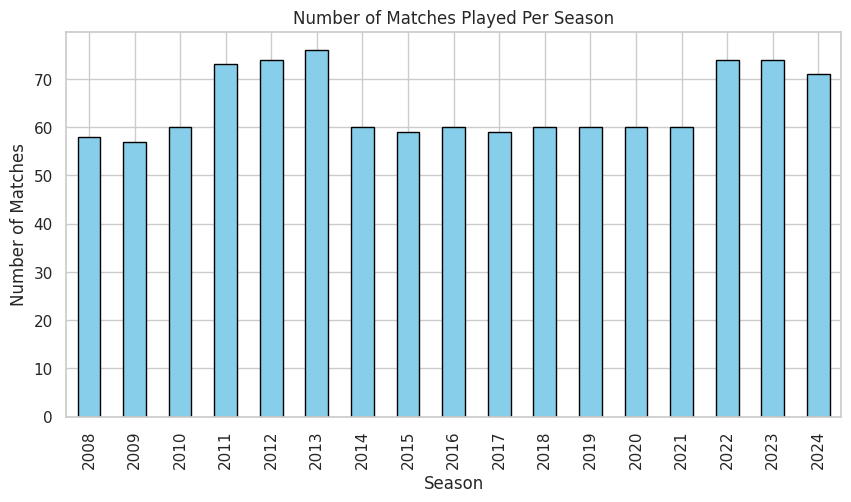

In [ ]:

matches_per_season = df.groupby('normalized_season').size()
print("Matches played per season:\n", matches_per_season)
plt.figure(figsize=(10, 5))
matches_per_season.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Matches Played Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()

**Most Successful Teams in IPL**
1. **Mumbai Indians** have the most wins (156), followed by **Chennai Super Kings** (138).
2. Top four teams exceed 100 wins; the rest lag significantly.
3. **Deccan Chargers** (88 wins) are the next strongest team.
4. Bottom teams, like **Kochi Tuskers Kerala**, have very few wins (5-6).


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
most_successful_teams = df['winner'].value_counts().reset_index()
most_successful_teams.columns = ['Team', 'Wins']

# Bar chart for most successful teams
fig = px.bar(
    most_successful_teams,
    x='Team',
    y='Wins',
    color='Wins',
    color_continuous_scale='Viridis',
    title='Most Successful Teams in IPL',
    text='Wins'
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Wins',
    template='plotly_white',
    xaxis=dict(tickangle=-45)
)
fig.show()

In [ ]:
win_trends = df.groupby(['normalized_season', 'winner']).size().reset_index(name='Wins')
win_trends.to_csv('win_trends.csv', index=False)


In [ ]:
df.match_type.unique()

array(['League', 'Semi Final', 'Final', '3rd Place Play-Off',
       'Qualifier 1', 'Elimination Final', 'Qualifier 2', 'Eliminator'],
      dtype=object)

**Top 5 Teams for play-offs**
1. **Chennai Super Kings** lead with **26 playoff appearances**.
2. **Mumbai Indians** have **20 appearances**.
3. **Royal Challengers Bangalore** follow with **16**.
4. **Kolkata Knight Riders** and **Sunrisers Hyderabad** have **15 and 14**, respectively.


In [ ]:
import pandas as pd
import plotly.express as px


# Define playoff match types
playoff_types = ['Semi Final', 'Final', '3rd Place Play-Off', 'Qualifier 1', 'Elimination Final', 'Qualifier 2', 'Eliminator']

# Filter playoff matches
playoff_matches = df[df['match_type'].isin(playoff_types)]

# Group by season to get unique playoff teams
playoff_teams_per_season = playoff_matches.groupby('normalized_season').apply(
    lambda x: pd.concat([x['team1'], x['team2']]).unique()
).reset_index()
playoff_teams_per_season.columns = ['Season', 'Playoff Teams']

# Flatten all playoff teams and count occurrences
all_playoff_teams = playoff_matches[['team1', 'team2']].melt(value_name='Team')['Team']
playoff_team_counts = all_playoff_teams.value_counts().reset_index()
playoff_team_counts.columns = ['Team', 'Playoff Appearances']

# Top 5 teams with most playoff appearances
top_5_playoff_teams = playoff_team_counts.head(5)


# Visualization of Top 5 Playoff Teams
fig = px.bar(
    top_5_playoff_teams,
    x='Team',
    y='Playoff Appearances',
    color='Playoff Appearances',
    color_continuous_scale='Turbo',
    title='Top 5 Teams with Most Playoff Appearances in IPL'
)
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Playoff Appearances',
    template='plotly_white',
    xaxis=dict(tickangle=-45)
)
fig.show()


<ipython-input-32-7b072a93d3c0>:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Season-wise Team Performance Heatmap**

1. **Chennai Super Kings**: Consistently high performance, winning between 8 to 12 games across seasons.
2. **Deccan Chargers**: Minimal success, peaking at 9 wins in one season.
3. **Delhi Capitals**: Improved performance over time, peaking at 11 wins in 2019-2020.
4. **Gujarat Lions**: Limited playoff impact with 9 wins in 2016 after years of inactivity.
5. **Gujarat Titans**: Newer team with no wins recorded yet.
etc..

**Additional Insights:**
- The chart highlights team performance and playoff appearances.
- Top winning seasons are marked in dark blue.
- Zeroes indicate inactive or unsuccessful seasons for various teams.




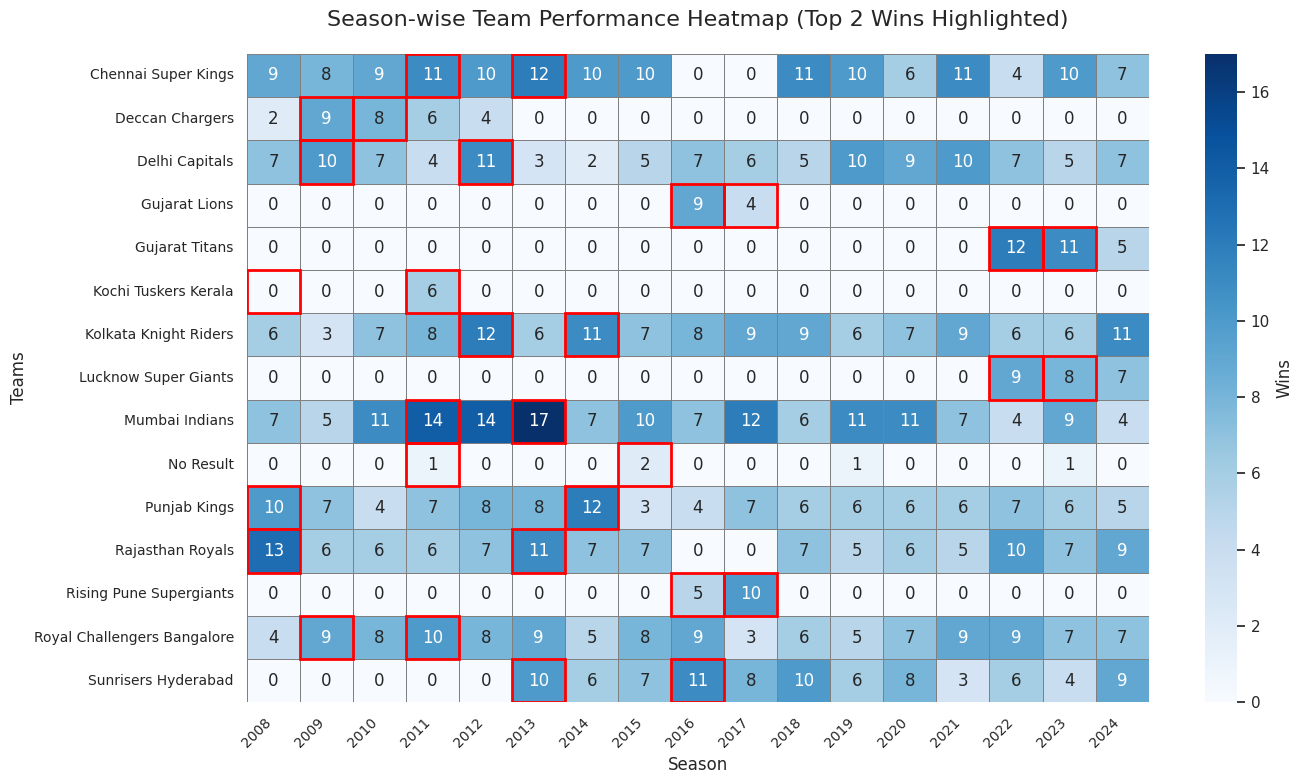

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `df` is your dataset with match details
# Filter matches by season and compute the number of wins for each team in all matches

# Group by season and count wins for all teams
all_seasons_data = []
for season in df['normalized_season'].unique():
    season_matches = df[df['normalized_season'] == season]

    # Count wins for all teams in the season
    team_wins = season_matches['winner'].value_counts()

    # Append data for the heatmap
    for team, wins in team_wins.items():
        all_seasons_data.append({'Season': season, 'Team': team, 'Wins': wins})

# Create DataFrame for heatmap
heatmap_df = pd.DataFrame(all_seasons_data)

# Pivot data for the heatmap
heatmap_pivot = heatmap_df.pivot(index='Team', columns='Season', values='Wins').fillna(0)

# Determine each team's top 2 seasons based on wins
highlight_cells = {}
for team in heatmap_pivot.index:
    top_seasons = heatmap_pivot.loc[team].nlargest(2).index
    for season in top_seasons:
        highlight_cells[(team, season)] = True

# Generate a mask to apply colors for top seasons
highlight_mask = np.zeros_like(heatmap_pivot, dtype=bool)
for i, team in enumerate(heatmap_pivot.index):
    for j, season in enumerate(heatmap_pivot.columns):
        if (team, season) in highlight_cells:
            highlight_mask[i, j] = True

# Plot Seaborn heatmap
plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    heatmap_pivot,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Wins'}
)

# Highlight the top seasons for each team
for i, team in enumerate(heatmap_pivot.index):
    for j, season in enumerate(heatmap_pivot.columns):
        if highlight_mask[i, j]:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

# Update axis labels and titles
ax.set_title("Season-wise Team Performance Heatmap (Top 2 Wins Highlighted)", fontsize=16, pad=20)
ax.set_xlabel("Season", fontsize=12)
ax.set_ylabel("Teams", fontsize=12)
ax.set_xticklabels(heatmap_pivot.columns, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(heatmap_pivot.index, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming df is the main IPL dataset

# Filter playoff matches
playoff_matches = df[df['match_type'].isin(['Semi Final', 'Final', 'Qualifier 1', 'Qualifier 2', 'Eliminator'])]

# Group by season to get unique playoff teams
playoff_teams_per_season = (
    playoff_matches.groupby('normalized_season')
    .apply(lambda x: list(set(x['team1']).union(set(x['team2']))))
    .reset_index(name='Playoff Teams')
)

playoff_teams_per_season.rename(columns={'normalized_season': 'Season'}, inplace=True)

# Prepare data for all seasons
final_data = []

for season in playoff_teams_per_season['Season']:
    # Get playoff teams
    teams_data = playoff_teams_per_season[playoff_teams_per_season['Season'] == season]
    playoff_teams = teams_data.iloc[0]['Playoff Teams']

    # Filter matches for the season
    season_matches = df[df['normalized_season'] == season]

    # Identify winner and finalist
    final_match = season_matches[season_matches['match_type'] == 'Final']
    if final_match.empty:
        continue  # Skip if no final match data exists for the season

    winner = final_match['winner'].iloc[0]
    finalist = final_match[['team1', 'team2']].stack().loc[lambda x: x != winner].iloc[0]

    # Count wins for each team
    team_wins = season_matches['winner'].value_counts()

    # Prepare data in the required order
    row = {
        'Season': season,
        'Qualified Team 1': playoff_teams[0],
        'Qualified Team 2': playoff_teams[1],
        'Finalist': finalist,
        'Winner': winner,
        'Matches Won Team 1': team_wins.get(playoff_teams[0], 0),
        'Matches Won Team 2': team_wins.get(playoff_teams[1], 0),
        'Matches Won Finalist': team_wins.get(finalist, 0),
        'Matches Won Winner': team_wins.get(winner, 0),
    }
    final_data.append(row)

# Convert to DataFrame
final_df = pd.DataFrame(final_data)

# Save to CSV
final_df.to_csv('ipl_playoff_teams_analysis.csv', index=False)

print("CSV file 'ipl_playoff_teams_analysis.csv' has been created.")


CSV file 'ipl_playoff_teams_analysis.csv' has been created.


<ipython-input-34-40a8fb8c3038>:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



# 2.Year-wise Winning


1.  **Objective**: Understand how teams have performed over the years.
2.  **Insight**: Detect dominant teams in specific eras and whether any team has consistently reached the finals



**Year-wise Winning Trends of Teams**
- **Team Wins by Season**: Counting wins for each IPL team to track performance over years.
- **Visual Trends**: Using line plots to illustrate yearly winning patterns.
- **Performance Comparison**: Identifying dominant and struggling teams through win counts.
- **Seasonal Insights**: Understanding variations in team performance across different IPL seasons.


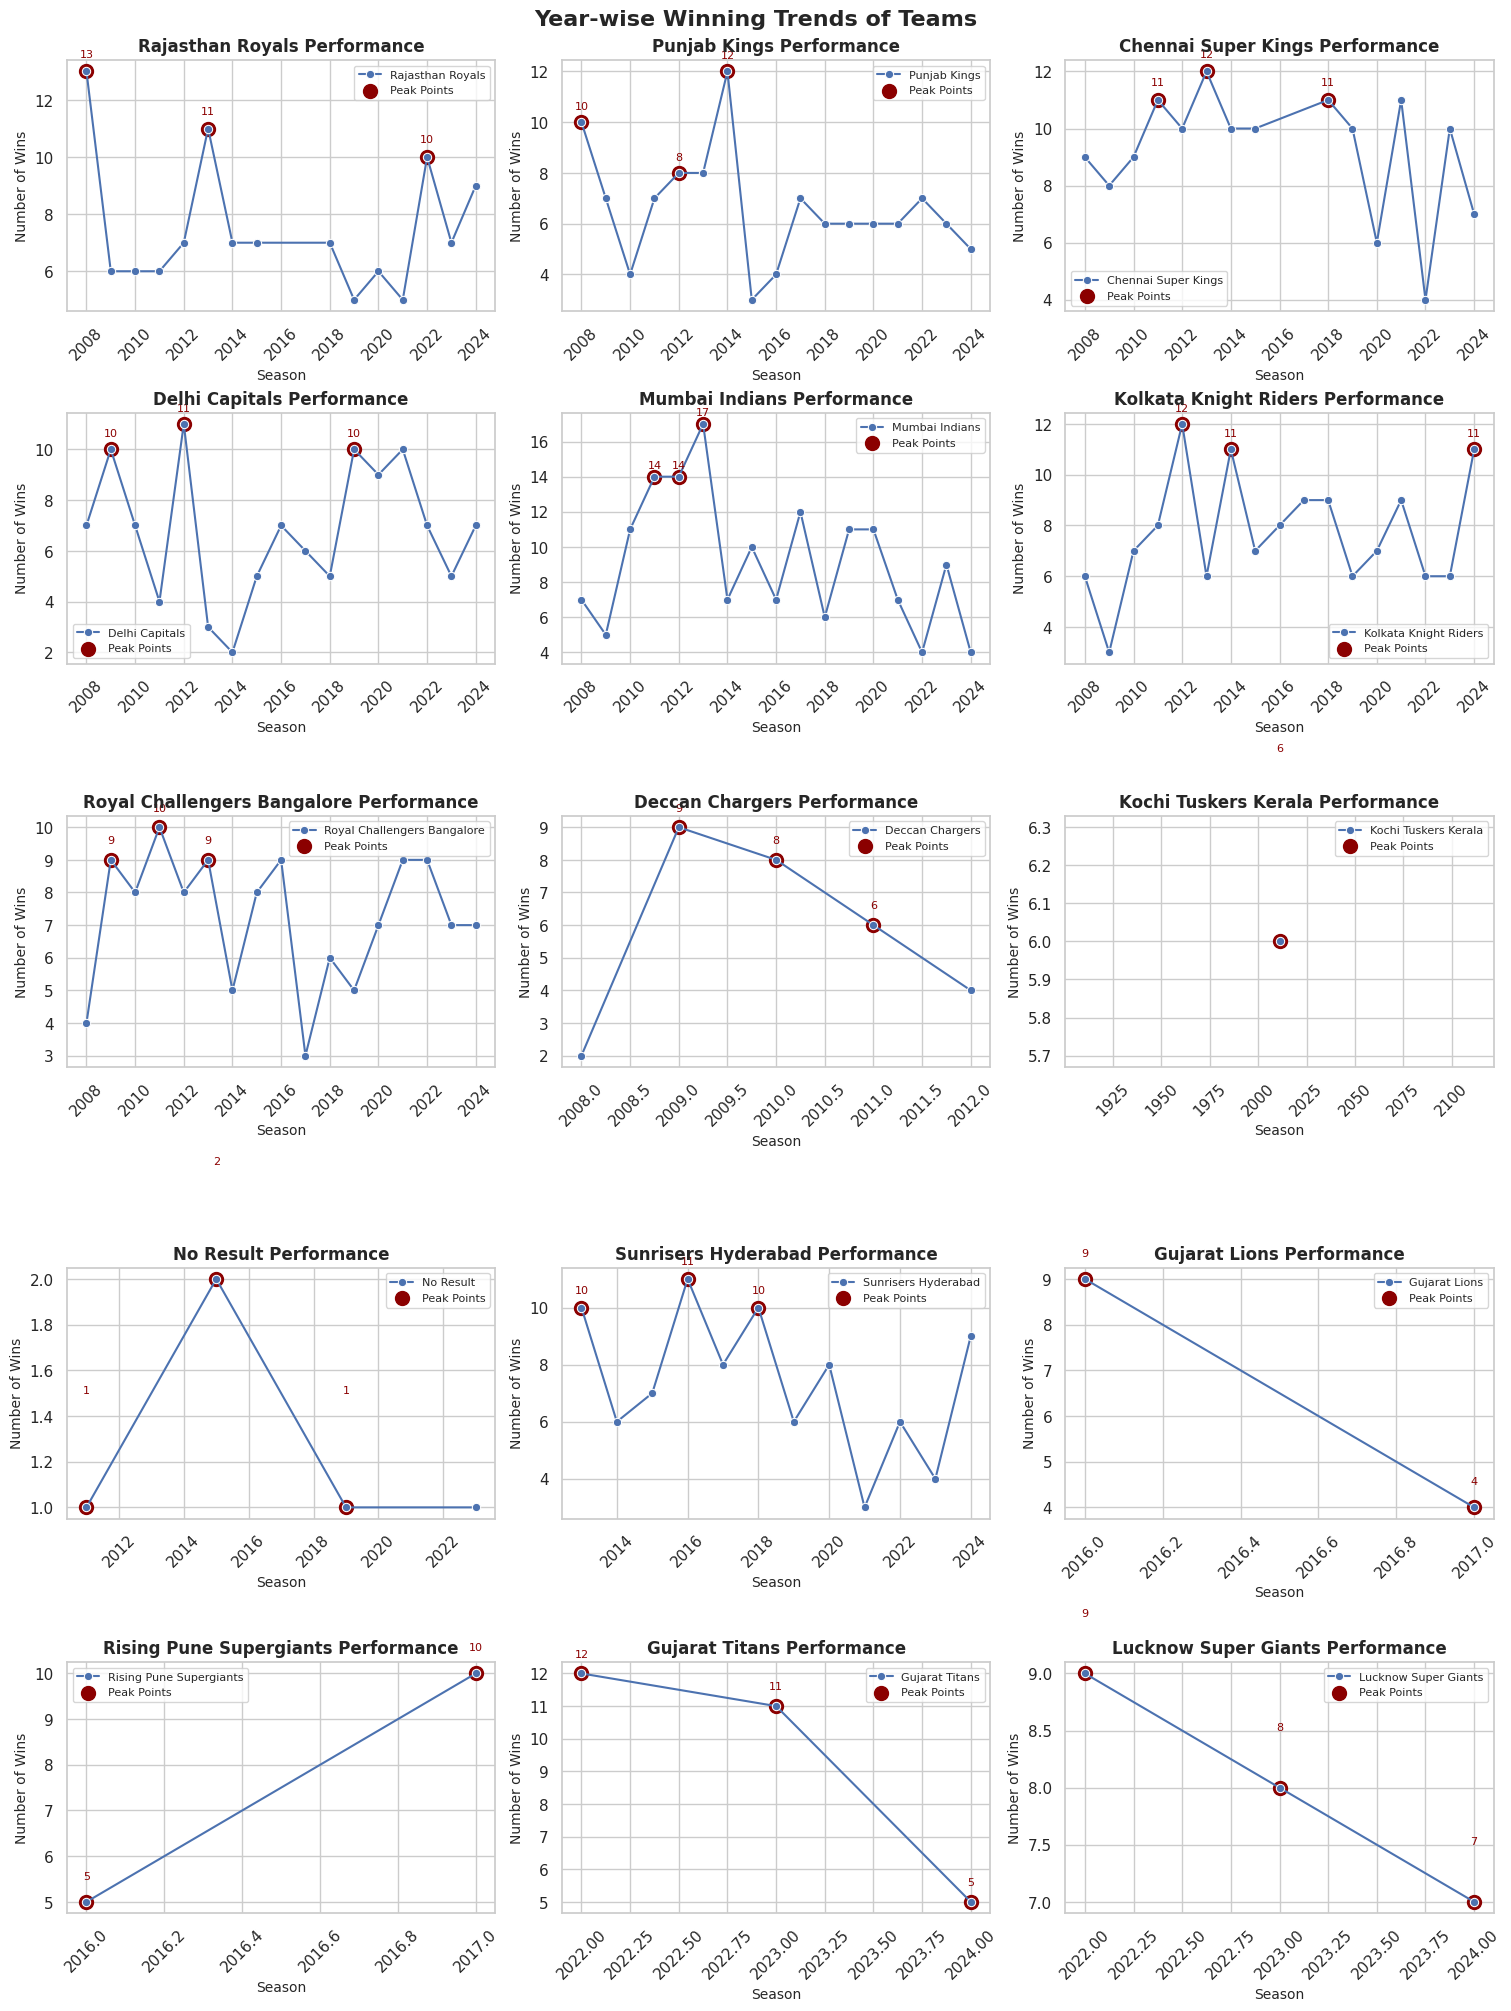

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is the main IPL dataset with 'normalized_season', 'winner', and other columns.

# Count the number of wins for each team across seasons
yearly_wins = (
    df.groupby(['normalized_season', 'winner'])
    .size()
    .reset_index(name='Wins')
    .rename(columns={'normalized_season': 'Season', 'winner': 'Team'})
)

# Ensure the data is sorted by season
yearly_wins = yearly_wins.sort_values(by=['Season', 'Wins'], ascending=[True, False])

# Get a list of unique teams
teams = yearly_wins['Team'].unique()

# Set Seaborn style
sns.set(style="whitegrid")

# Determine the grid layout for subplots
num_teams = len(teams)
num_cols = 3  # Number of columns in the grid
num_rows = (num_teams + num_cols - 1) // num_cols  # Calculate required rows

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4), constrained_layout=True)
axes = axes.flatten()

# Generate line plots for each team
for i, team in enumerate(teams):
    team_data = yearly_wins[yearly_wins['Team'] == team]

    # Find top 2-3 peak points
    peak_points = team_data.nlargest(3, 'Wins')

    # Plot on the respective subplot
    sns.lineplot(data=team_data, x='Season', y='Wins', marker='o', ax=axes[i], label=f"{team}")

    # Highlight top peaks
    axes[i].scatter(
        peak_points['Season'],
        peak_points['Wins'],
        color='darkred',
        s=100,
        label='Peak Points'
    )

    # Add annotations for peak points
    for _, row in peak_points.iterrows():
        axes[i].text(
            row['Season'], row['Wins'] + 0.5, f"{row['Wins']}",
            color='darkred', fontsize=8, ha='center'
        )

    # Customize each subplot
    axes[i].set_title(f"{team} Performance", fontsize=12, weight='bold')
    axes[i].set_xlabel("Season", fontsize=10)
    axes[i].set_ylabel("Number of Wins", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(fontsize=8)

# Remove empty subplots
for j in range(len(teams), len(axes)):
    fig.delaxes(axes[j])

# Display the complete figure
plt.suptitle("Year-wise Winning Trends of Teams", fontsize=16, weight='bold')
plt.show()


Win Percentage Against Opponents analysis:

- **Win Percentage Calculation**: Analyzing each team's win percentage against specific opponents in the IPL.
- **Performance Comparison**: Identifying strong and weak matchups by evaluating how teams perform against each opponent.
- **Visual Representation**: Using plots to illustrate win percentages, making it easy to compare team performances at a glance.
- **Strategic Insights**: Drawing insights that can inform strategies or expectations for future matches based on historical performance.

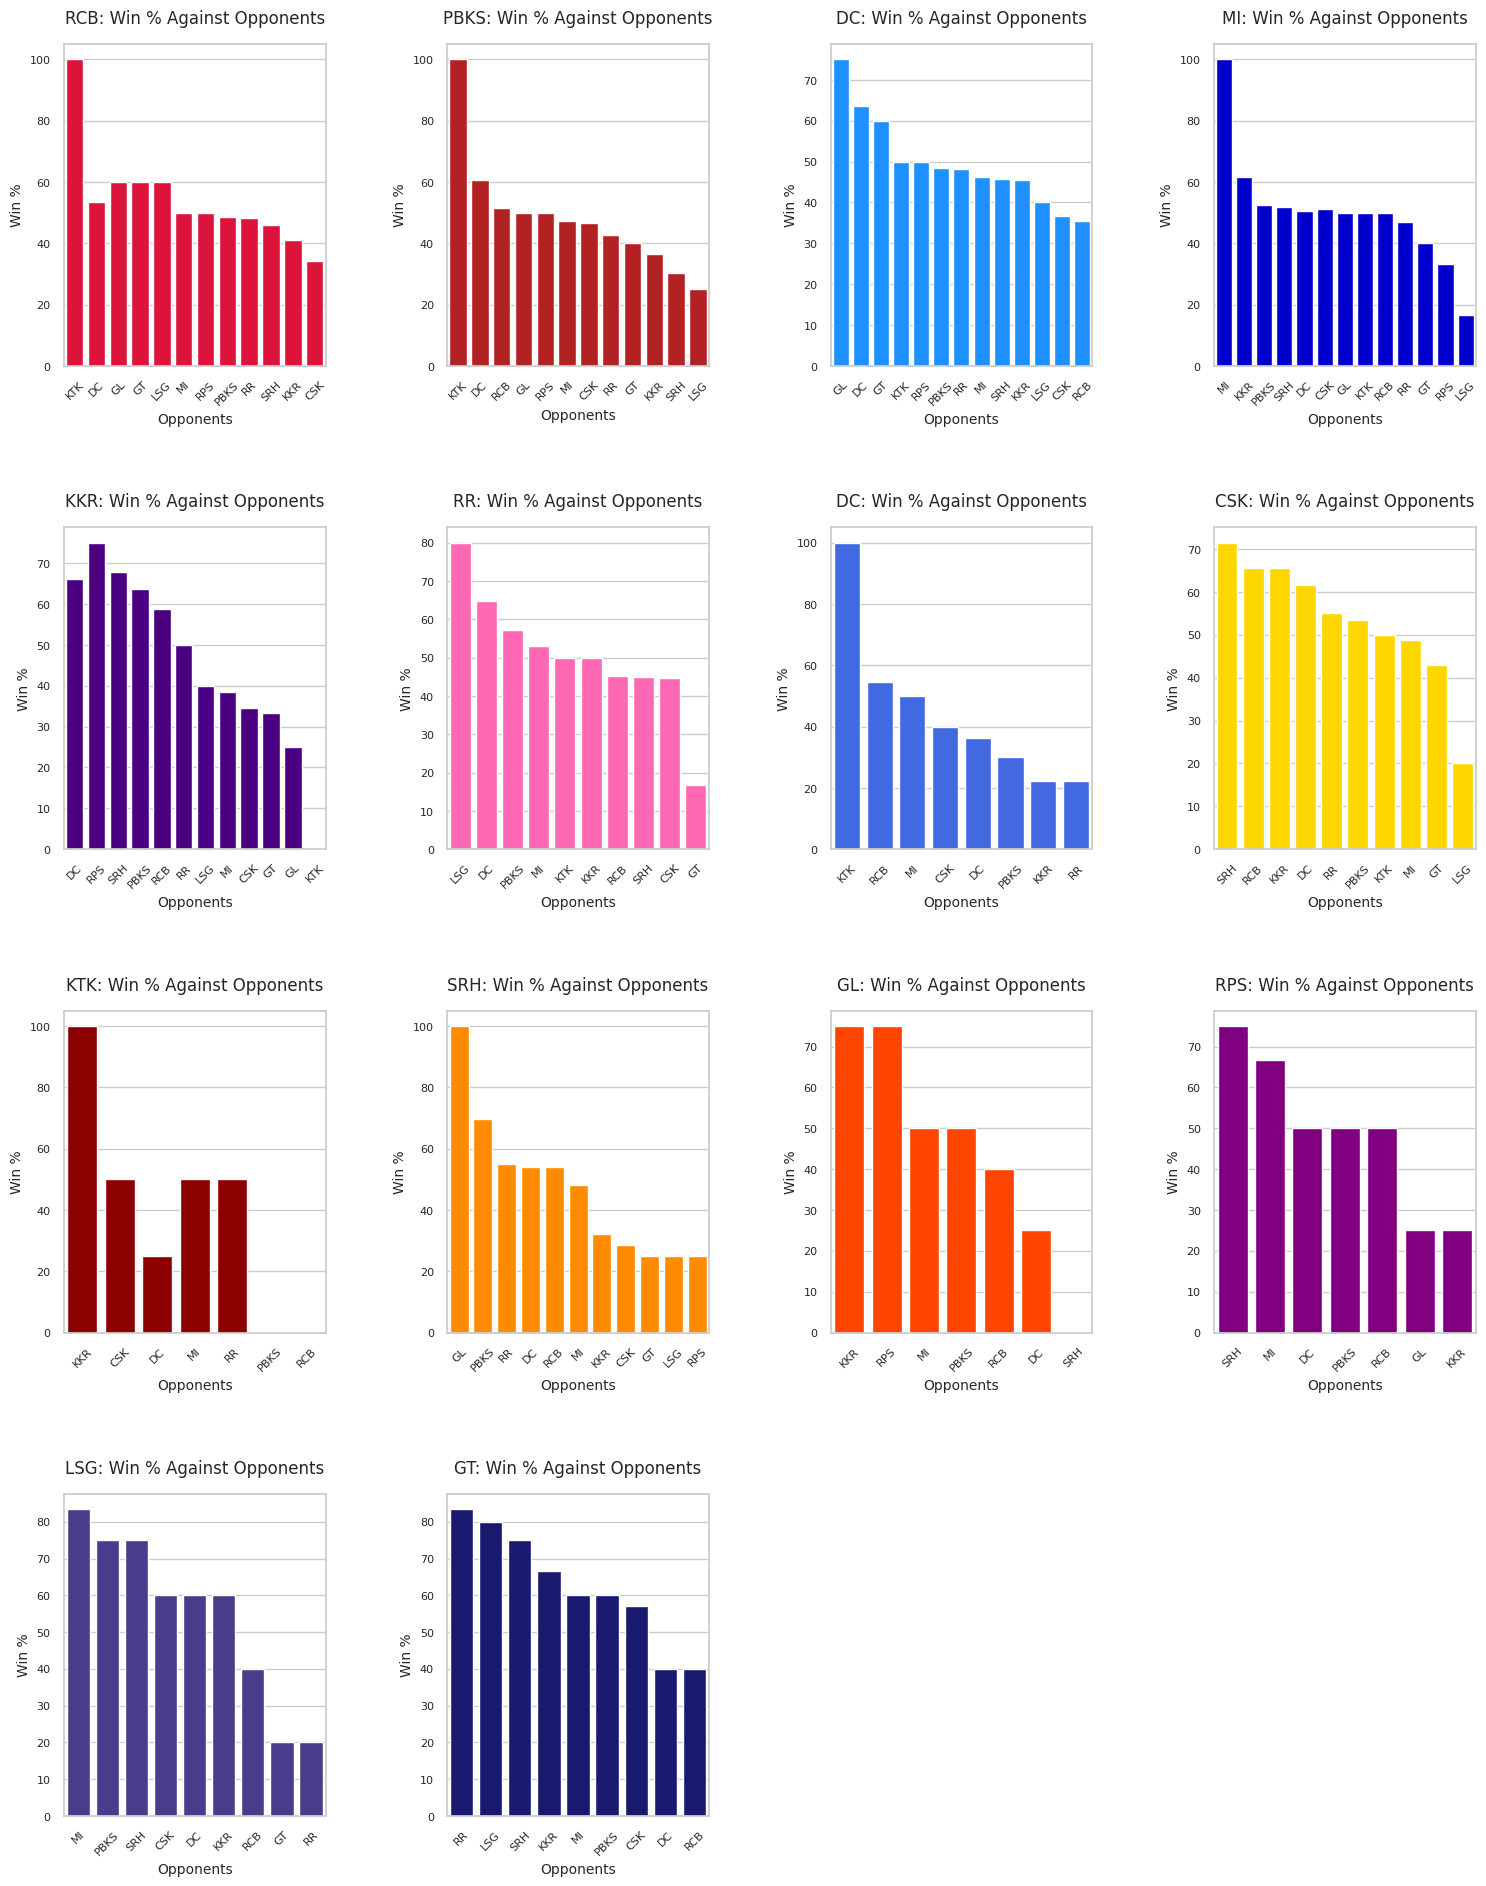

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the custom colors for the teams
team_colors = {
    'Royal Challengers Bangalore': 'crimson',
    'Punjab Kings': 'firebrick',
    'Delhi Capitals': 'dodgerblue',
    'Mumbai Indians': 'mediumblue',
    'Kolkata Knight Riders': 'indigo',
    'Rajasthan Royals': 'hotpink',
    'Deccan Chargers': 'royalblue',
    'Chennai Super Kings': 'gold',
    'Kochi Tuskers Kerala': 'darkred',
    'Sunrisers Hyderabad': 'darkorange',
    'Gujarat Lions': 'orangered',
    'Rising Pune Supergiants': 'purple',
    'Lucknow Super Giants': 'darkslateblue',
    'Gujarat Titans': 'midnightblue'
}

# Abbreviate team names
team_abbreviations = {
    'Royal Challengers Bangalore': 'RCB',
    'Punjab Kings': 'PBKS',
    'Delhi Capitals': 'DC',
    'Mumbai Indians': 'MI',
    'Kolkata Knight Riders': 'KKR',
    'Rajasthan Royals': 'RR',
    'Deccan Chargers': 'DC',
    'Chennai Super Kings': 'CSK',
    'Kochi Tuskers Kerala': 'KTK',
    'Sunrisers Hyderabad': 'SRH',
    'Gujarat Lions': 'GL',
    'Rising Pune Supergiants': 'RPS',
    'Lucknow Super Giants': 'LSG',
    'Gujarat Titans': 'GT'
}

def analyze_team_vs_teams(team_name, df):
    # Filter matches where the given team participated
    team_matches = df[(df['team1'] == team_name) | (df['team2'] == team_name)]

    opponents = (
        team_matches
        .assign(opponent=lambda x: x.apply(
            lambda row: row['team2'] if row['team1'] == team_name else row['team1'], axis=1))
        .groupby('opponent')
        .size()
        .reset_index(name='Total Matches')
    )

    # Calculate matches won against each opponent
    wins = (
        team_matches[team_matches['winner'] == team_name]
        .assign(opponent=lambda x: x.apply(
            lambda row: row['team2'] if row['team1'] == team_name else row['team1'], axis=1))
        .groupby('opponent')
        .size()
        .reset_index(name='Wins')
    )
    analysis = pd.merge(opponents, wins, on='opponent', how='left').fillna(0)
    analysis['Wins'] = analysis['Wins'].astype(int)

    # Calculate win percentage
    analysis['Win Percentage (%)'] = (analysis['Wins'] / analysis['Total Matches']) * 100

    # Sort by win percentage
    analysis = analysis.sort_values(by='Win Percentage (%)', ascending=False)

    return analysis

# Assuming 'df' is the IPL dataset containing columns 'team1', 'team2', and 'winner'.
teams = df['team1'].unique()

# Calculate number of rows and columns for subplots (4 columns for better organization)
num_teams = len(teams)
num_cols = 4
num_rows = np.ceil(num_teams / num_cols).astype(int)  # Calculate rows based on number of teams

# Set up the plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Loop through all teams and create a barplot for each team's win percentage against opponents
for i, team in enumerate(teams):
    analysis = analyze_team_vs_teams(team, df)

    # Abbreviate team names for x-axis labels
    analysis['opponent'] = analysis['opponent'].map(team_abbreviations)

    # Plot for each team
    bars = sns.barplot(
    x='opponent', y='Win Percentage (%)', data=analysis, ax=axes[i], errorbar=None, color='lightgray'
)

    # Highlight bars for the respective team
    for bar, opponent in zip(bars.patches, analysis['opponent']):
        if opponent in team_abbreviations.values():  # Match opponent to team name
            bar.set_facecolor(team_colors.get(team, 'gray'))  # Set team-specific color to bar

    axes[i].set_title(f"{team_abbreviations.get(team, team)}: Win % Against Opponents", fontsize=12, pad=15)
    axes[i].set_xlabel("Opponents", fontsize=10)
    axes[i].set_ylabel("Win %", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove unused subplots (if any)
for i in range(num_teams, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better readability
plt.tight_layout(pad=4.0)
plt.show()


In [ ]:
import os
import pandas as pd
import plotly.express as px

def analyze_team_vs_teams(team_name, df, output_folder):
    # Filter matches where the given team participated
    team_matches = df[(df['team1'] == team_name) | (df['team2'] == team_name)]

    opponents = (
        team_matches
        .assign(opponent=lambda x: x.apply(
            lambda row: row['team2'] if row['team1'] == team_name else row['team1'], axis=1))
        .groupby('opponent')
        .size()
        .reset_index(name='Total Matches')
    )

    # Calculate matches won against each opponent
    wins = (
        team_matches[team_matches['winner'] == team_name]
        .assign(opponent=lambda x: x.apply(
            lambda row: row['team2'] if row['team1'] == team_name else row['team1'], axis=1))
        .groupby('opponent')
        .size()
        .reset_index(name='Wins')
    )
    analysis = pd.merge(opponents, wins, on='opponent', how='left').fillna(0)
    analysis['Wins'] = analysis['Wins'].astype(int)

    # Calculate win percentage
    analysis['Win Percentage (%)'] = (analysis['Wins'] / analysis['Total Matches']) * 100

    # Sort by win percentage
    analysis = analysis.sort_values(by='Win Percentage (%)', ascending=False)

    # Save analysis to a CSV file
    csv_path = os.path.join(output_folder, f"{team_name}_vs_all_teams_analysis.csv")
    analysis.to_csv(csv_path, index=False)

    # Create a comparative analysis plot
    fig = px.bar(
        analysis,
        x='opponent',
        y='Win Percentage (%)',
        color='Win Percentage (%)',
        text='Win Percentage (%)',
        title=f"{team_name}: Win Percentage Against All Teams",
        labels={'opponent': 'Opponent Teams'},
        template="plotly_white"
    )
    fig.update_traces(texttemplate='%{text:.2f}%', textposition='auto')
    fig.update_layout(
        xaxis_title="Opponent Teams",
        yaxis_title="Win Percentage (%)",
        title_x=0.5,
        coloraxis_colorbar=dict(title="Win %"),
    )

    return csv_path, fig


# Create the output folder if it doesn't exist
output_folder = "win_percent"
os.makedirs(output_folder, exist_ok=True)

# List of unique teams
teams = pd.concat([df['team1'], df['team2']]).unique()

# Analyze and save for each team
for team in teams:
    csv_path, fig = analyze_team_vs_teams(team, df, output_folder)
    print(f"CSV file generated for {team} at: {csv_path}")
    # Optionally, you can save the plots as images or show them:
    # fig.write_image(os.path.join(output_folder, f"{team}_win_percentage.png"))


CSV file generated for Royal Challengers Bangalore at: win_percent/Royal Challengers Bangalore_vs_all_teams_analysis.csv
CSV file generated for Punjab Kings at: win_percent/Punjab Kings_vs_all_teams_analysis.csv
CSV file generated for Delhi Capitals at: win_percent/Delhi Capitals_vs_all_teams_analysis.csv
CSV file generated for Mumbai Indians at: win_percent/Mumbai Indians_vs_all_teams_analysis.csv
CSV file generated for Kolkata Knight Riders at: win_percent/Kolkata Knight Riders_vs_all_teams_analysis.csv
CSV file generated for Rajasthan Royals at: win_percent/Rajasthan Royals_vs_all_teams_analysis.csv
CSV file generated for Deccan Chargers at: win_percent/Deccan Chargers_vs_all_teams_analysis.csv
CSV file generated for Chennai Super Kings at: win_percent/Chennai Super Kings_vs_all_teams_analysis.csv
CSV file generated for Kochi Tuskers Kerala at: win_percent/Kochi Tuskers Kerala_vs_all_teams_analysis.csv
CSV file generated for Sunrisers Hyderabad at: win_percent/Sunrisers Hyderabad_vs

# 3. Teams with Finals Appearances

**Heatmap of Finals Appearances and Titles Won by Team**

1. **Performance Metrics**: Analyzing teams based on finals appearances and titles won.
2. **Data Formatting**: Preparing a DataFrame for heatmap visualization.
3. **Heatmap Creation**: Generating a heatmap to compare team performances visually.
4. **Trend Identification**: Identifying patterns in team success within the IPL.



In [ ]:
def analyze_consistent_finalists(df):
    final_matches = df[df['match_type'] == 'Final']

    # Get the list of finalists
    finalists = pd.concat([final_matches['team1'], final_matches['team2']])
    finalist_counts = finalists.value_counts().reset_index()
    finalist_counts.columns = ['Team', 'Finals Appearances']

    # Count titles won by each team
    titles_won = final_matches['winner'].value_counts().reset_index()
    titles_won.columns = ['Team', 'Titles Won']

    # Merge the data
    consistent_finalists = pd.merge(finalist_counts, titles_won, on='Team', how='left').fillna(0)

    # Ensure numeric types
    consistent_finalists[['Finals Appearances', 'Titles Won']] = (
        consistent_finalists[['Finals Appearances', 'Titles Won']].astype(int)
    )

    return consistent_finalists

In [ ]:
import pandas as pd

def analyze_team_performance(df):
    teams_played = pd.concat([df['team1'], df['team2']]).value_counts().reset_index()
    teams_played.columns = ['Team', 'Matches Played']

    # Count matches won by each team
    teams_won = df['winner'].value_counts().reset_index()
    teams_won.columns = ['Team', 'Matches Won']

    # Filter for final matches and count finals appearances
    final_matches = df[df['match_type'] == 'Final']
    finalists = pd.concat([final_matches['team1'], final_matches['team2']])
    finalist_counts = finalists.value_counts().reset_index()
    finalist_counts.columns = ['Team', 'Finals Appearances']

    # Count titles won by each team
    titles_won = final_matches['winner'].value_counts().reset_index()
    titles_won.columns = ['Team', 'Titles Won']

    # Merge all data into a single DataFrame
    team_summary = pd.merge(teams_played, teams_won, on='Team', how='outer').fillna(0)
    team_summary = pd.merge(team_summary, finalist_counts, on='Team', how='outer').fillna(0)
    team_summary = pd.merge(team_summary, titles_won, on='Team', how='outer').fillna(0)

    # Ensure numeric types
    team_summary[['Matches Played', 'Matches Won', 'Finals Appearances', 'Titles Won']] = (
        team_summary[['Matches Played', 'Matches Won', 'Finals Appearances', 'Titles Won']].astype(int)
    )

    return team_summary

# Example Usage
finalist_counts = analyze_consistent_finalists(df)

# Display teams consistently reaching the finals
print("Teams with consistent finals appearances:")
print(finalist_counts)

# Save to CSV
finalist_counts.to_csv("consistent_finalists_analysis.csv", index=False)
print("Finalists analysis saved to 'consistent_finalists_analysis.csv'")


Teams with consistent finals appearances:
                           Team  Finals Appearances  Titles Won
0           Chennai Super Kings                  10           5
1                Mumbai Indians                   6           5
2         Kolkata Knight Riders                   4           3
3   Royal Challengers Bangalore                   3           0
4           Sunrisers Hyderabad                   3           1
5              Rajasthan Royals                   2           1
6                Gujarat Titans                   2           1
7                Delhi Capitals                   1           0
8               Deccan Chargers                   1           1
9                  Punjab Kings                   1           0
10      Rising Pune Supergiants                   1           0
Finalists analysis saved to 'consistent_finalists_analysis.csv'


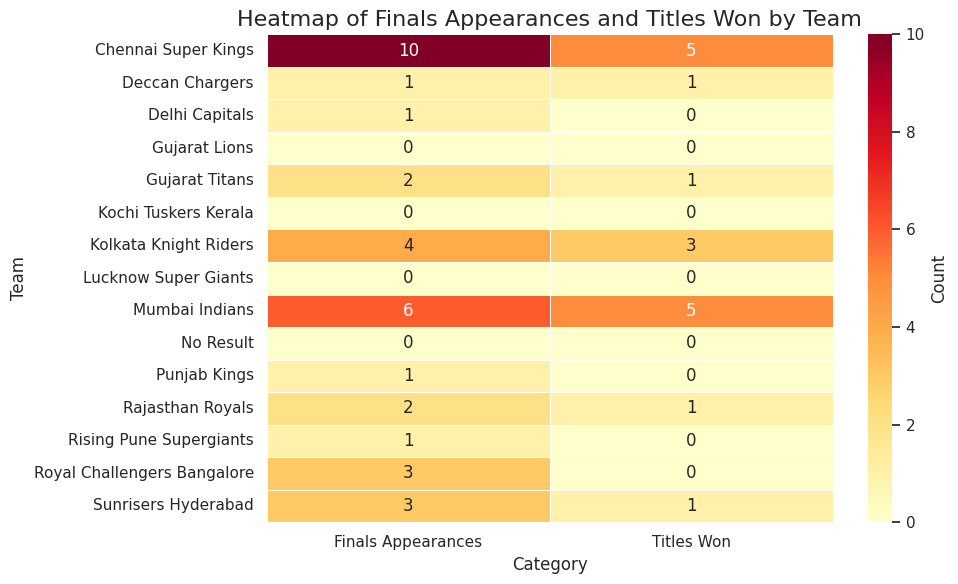

In [ ]:
# Analyze the dataset
team_summary = analyze_team_performance(df)

# Create a DataFrame suitable for the heatmap
heatmap_data = team_summary.set_index('Team')[['Finals Appearances', 'Titles Won']]

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create heatmap
heatmap = sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", cbar_kws={'label': 'Count'}, linewidths=0.5, fmt='g')

# Add title and labels
plt.title('Heatmap of Finals Appearances and Titles Won by Team', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Team', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

#4. Win Margin Analysis


1.   By Wicket and Runs
2.   by Toss Decision
3.   City or Venue Dominance Analysis Plan




## By Wicket and Runs

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your dataset is loaded into a DataFrame called `df`

def analyze_win_margins(data):
    # Filter matches based on win result type
    win_by_runs = data[data['result'] == 'runs']
    win_by_wickets = data[data['result'] == 'wickets']

    # Calculate total and average win margins by team
    runs_margin = (
        win_by_runs.groupby('winner')['result_margin']
        .agg(total_runs_margin='sum', avg_runs_margin='mean', count='count')
        .reset_index()
    )

    wickets_margin = (
        win_by_wickets.groupby('winner')['result_margin']
        .agg(total_wickets_margin='sum', avg_wickets_margin='mean', count='count')
        .reset_index()
    )

    # Create plots for win by runs
    fig_runs = go.Figure()
    fig_runs.add_trace(go.Bar(
        x=runs_margin['winner'],
        y=runs_margin['total_runs_margin'],
        text=runs_margin['avg_runs_margin'].round(2),
        textposition='auto',
        name="Total Margin by Runs",
        marker=dict(color='skyblue')
    ))

    fig_runs.update_layout(
        title="Win Margins by Runs (Total & Average)",
        xaxis_title="Teams",
        yaxis_title="Total Margin (Runs)",
        template="plotly_white",
    )

    # Create plots for win by wickets
    fig_wickets = go.Figure()
    fig_wickets.add_trace(go.Bar(
        x=wickets_margin['winner'],
        y=wickets_margin['total_wickets_margin'],
        text=wickets_margin['avg_wickets_margin'].round(2),
        textposition='auto',
        name="Total Margin by Wickets",
        marker=dict(color='gold')
    ))

    fig_wickets.update_layout(
        title="Win Margins by Wickets (Total & Average)",
        xaxis_title="Teams",
        yaxis_title="Total Margin (Wickets)",
        template="plotly_white",
    )

    return fig_runs, fig_wickets

# Call the function with your dataset
fig_runs, fig_wickets = analyze_win_margins(df)

# Show plots
fig_runs.show()
fig_wickets.show()


## by Toss Decision

In [ ]:
import pandas as pd

def analyze_win_margin_by_toss_decision(data):
    # Filter rows where the winner is not NaN (valid matches)
    valid_data = data[data['winner'].notna()]

    # Group data by toss decision and calculate metrics
    toss_decision_analysis = valid_data.groupby('toss_decision').apply(
        lambda group: pd.Series({
            'total_runs_margin': group.loc[group['result'] == 'runs', 'result_margin'].sum(),
            'avg_runs_margin': group.loc[group['result'] == 'runs', 'result_margin'].mean(),
            'count_runs': group.loc[group['result'] == 'runs', 'result_margin'].count(),
            'total_wickets_margin': group.loc[group['result'] == 'wickets', 'result_margin'].sum(),
            'avg_wickets_margin': group.loc[group['result'] == 'wickets', 'result_margin'].mean(),
            'count_wickets': group.loc[group['result'] == 'wickets', 'result_margin'].count()
        })
    )

    # Reset index for better readability
    toss_decision_analysis.reset_index(inplace=True)

    return toss_decision_analysis

# Example usage
toss_decision_analysis = analyze_win_margin_by_toss_decision(df)

# Display the analysis
print(toss_decision_analysis)


  toss_decision  total_runs_margin  avg_runs_margin  count_runs  \
0           bat             5117.0        28.909605       177.0   
1         field             9875.0        30.763240       321.0   

   total_wickets_margin  avg_wickets_margin  count_wickets  
0                1323.0            6.391304          207.0  
1                2256.0            6.080863          371.0  


<ipython-input-42-673ae8d6e894>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Toss winner counts:
 toss_winner
Mumbai Indians                 163
Delhi Capitals                 130
Chennai Super Kings            122
Kolkata Knight Riders          122
Royal Challengers Bangalore    121
Rajasthan Royals               120
Punjab Kings                   109
Sunrisers Hyderabad             88
Deccan Chargers                 43
Gujarat Titans                  22
Lucknow Super Giants            19
Gujarat Lions                   15
Rising Pune Supergiants         13
Kochi Tuskers Kerala             8
Name: count, dtype: int64
Toss decision counts:
 toss_decision
field    704
bat      391
Name: count, dtype: int64


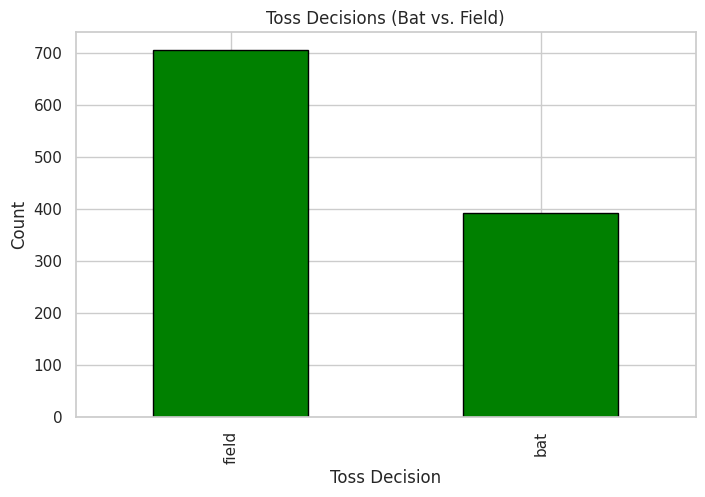

In [ ]:

toss_winners = df['toss_winner'].value_counts()
print("Toss winner counts:\n", toss_winners)


toss_decisions = df['toss_decision'].value_counts()
print("Toss decision counts:\n", toss_decisions)

plt.figure(figsize=(8, 5))
toss_decisions.plot(kind='bar', color='green', edgecolor='black')
plt.title('Toss Decisions (Bat vs. Field)')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()


### For Overall Season

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def visualize_toss_decision_analysis(toss_decision_analysis):
    # Create subplots for runs and wickets margins
    fig = make_subplots(rows=1, cols=2, shared_yaxes=True,
                        subplot_titles=('Runs Analysis by Toss',
                                        'Wickets Analysis by Toss'),
                        column_widths=[0.48, 0.48])  # Adjust column widths to fit titles

    # Add Runs Margin Bar chart
    fig.add_trace(go.Bar(
        x=toss_decision_analysis['toss_decision'],
        y=toss_decision_analysis['total_runs_margin'],
        name='Total Runs Margin',
        marker_color='blue',
        text=toss_decision_analysis['total_runs_margin'],
        textposition='auto'
    ), row=1, col=1)

    fig.add_trace(go.Bar(
        x=toss_decision_analysis['toss_decision'],
        y=toss_decision_analysis['avg_runs_margin'],
        name='Average Runs Margin',
        marker_color='cyan',
        text=toss_decision_analysis['avg_runs_margin'].round(2),
        textposition='auto'
    ), row=1, col=1)

    # Add Wickets Margin Bar chart
    fig.add_trace(go.Bar(
        x=toss_decision_analysis['toss_decision'],
        y=toss_decision_analysis['total_wickets_margin'],
        name='Total Wickets Margin',
        marker_color='green',
        text=toss_decision_analysis['total_wickets_margin'],
        textposition='auto'
    ), row=1, col=2)

    fig.add_trace(go.Bar(
        x=toss_decision_analysis['toss_decision'],
        y=toss_decision_analysis['avg_wickets_margin'],
        name='Average Wickets Margin',
        marker_color='lightgreen',
        text=toss_decision_analysis['avg_wickets_margin'].round(2),
        textposition='auto'
    ), row=1, col=2)

    # Update Layout
    fig.update_layout(
        title='Runs and Wickets Margin Analysis by Toss Decision',
        xaxis_title='Toss Decision',
        yaxis_title='Margin (Runs/Wickets)',
        barmode='group',
        template='plotly_white',
        showlegend=True,
        height=500  # Increase height for better spacing
    )

    # Adjust subplot titles alignment
    fig.update_layout(
        title_x=0.5,  # Center the main title
        title_y=0.95,  # Adjust main title's y-position
    )

    fig.show()

# Example Usage
toss_decision_analysis = analyze_win_margin_by_toss_decision(df)
visualize_toss_decision_analysis(toss_decision_analysis)


<ipython-input-42-673ae8d6e894>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Insights Gathered**
1. **Fielding Advantage**: Teams that field first have a higher total runs margin (9,875) compared to those batting first (5,117).
2. **Wickets Performance**: Fielding results in more total wickets (2,256) than batting (1,323), though batting has a slight edge in average wickets.
3. **Strategic Trends**: The benefits of fielding may influence future toss decisions, favoring teams that choose to field.
4. **Team Evaluation**: Teams can assess their strengths based on toss outcomes to refine strategies and training.


### For Particular Overall Season

In [ ]:
season=2008
season_data=df[df['normalized_season'] == season]

In [ ]:
toss_decision_analysis = season_data.groupby('toss_decision').apply(
        lambda group: pd.Series({
            'total_runs_margin': group.loc[group['result'] == 'runs', 'result_margin'].sum(),
            'avg_runs_margin': group.loc[group['result'] == 'runs', 'result_margin'].mean(),
            'count_runs': group.loc[group['result'] == 'runs', 'result_margin'].count(),
            'total_wickets_margin': group.loc[group['result'] == 'wickets', 'result_margin'].sum(),
            'avg_wickets_margin': group.loc[group['result'] == 'wickets', 'result_margin'].mean(),
            'count_wickets': group.loc[group['result'] == 'wickets', 'result_margin'].count()
        })
    )

    # Ensure no duplication by converting the index to a regular column
toss_decision_analysis = toss_decision_analysis.reset_index()

<ipython-input-46-13e1d7e7f507>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
toss_decision_analysis.reset_index(inplace=True)

In [ ]:
fig_runs = go.Figure()
fig_runs.add_trace(go.Bar(
    x=toss_decision_analysis['toss_decision'],
    y=toss_decision_analysis['total_runs_margin'],
    name='Total Runs Margin',
    marker_color='blue',
    text=toss_decision_analysis['total_runs_margin'],
    textposition='auto'
))
fig_runs.add_trace(go.Bar(
    x=toss_decision_analysis['toss_decision'],
    y=toss_decision_analysis['avg_runs_margin'],
    name='Average Runs Margin',
    marker_color='cyan',
    text=toss_decision_analysis['avg_runs_margin'].round(2),
    textposition='auto'
))
fig_runs.update_layout(
    title=f'Runs Margin Analysis by Toss Decision (Season {season})',
    xaxis_title='Toss Decision',
    yaxis_title='Margin (Runs)',
    barmode='group',
    template='plotly_white'
)



In [ ]:
# Create bar charts for wickets margin
fig_wickets = go.Figure()
fig_wickets.add_trace(go.Bar(
    x=toss_decision_analysis['toss_decision'],
    y=toss_decision_analysis['total_wickets_margin'],
    name='Total Wickets Margin',
    marker_color='green',
    text=toss_decision_analysis['total_wickets_margin'],
    textposition='auto'
))
fig_wickets.add_trace(go.Bar(
    x=toss_decision_analysis['toss_decision'],
    y=toss_decision_analysis['avg_wickets_margin'],
    name='Average Wickets Margin',
    marker_color='lightgreen',
    text=toss_decision_analysis['avg_wickets_margin'].round(2),
    textposition='auto'
))
fig_wickets.update_layout(
    title=f'Wickets Margin Analysis by Toss Decision (Season {season})',
    xaxis_title='Toss Decision',
    yaxis_title='Margin (Wickets)',
    barmode='group',
    template='plotly_white'
)


## City or Venue Dominance Analysis Plan

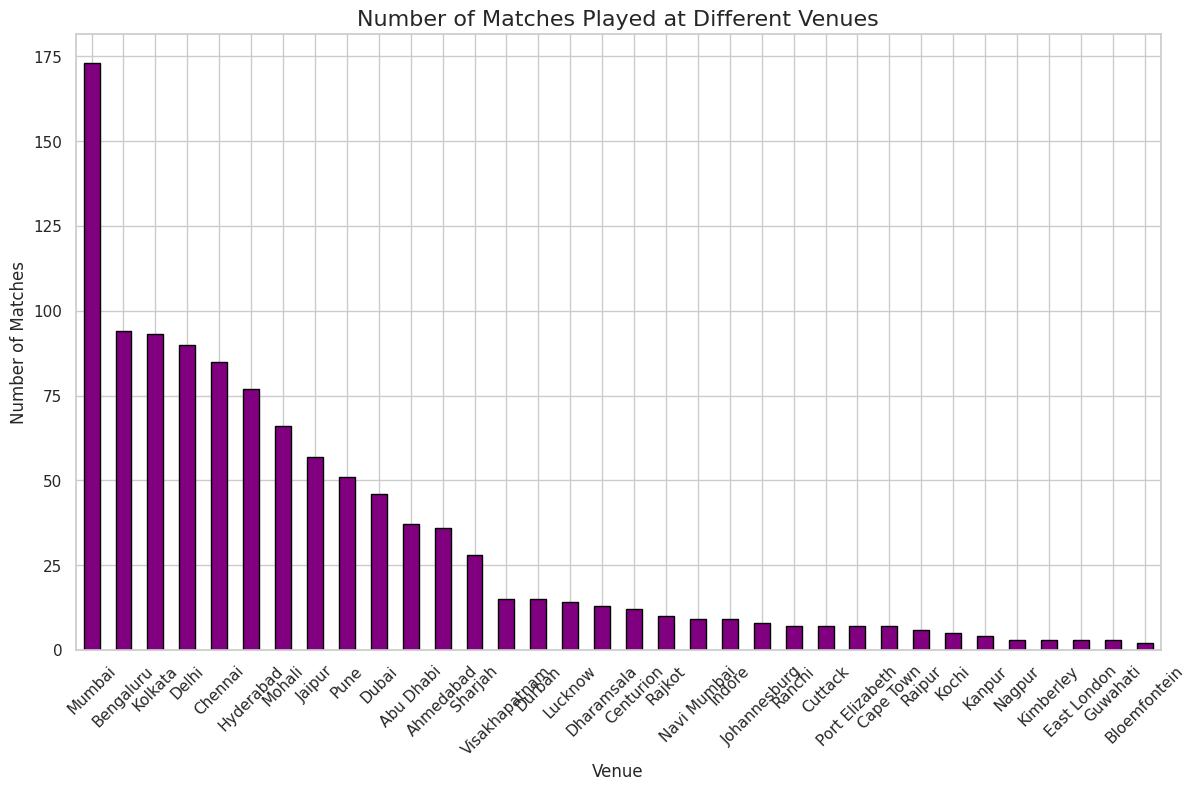

In [ ]:
venue_outcomes = df['city'].value_counts()

plt.figure(figsize=(14, 8))
venue_outcomes.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Matches Played at Different Venues', fontsize=16)
plt.xlabel('Venue', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.show()

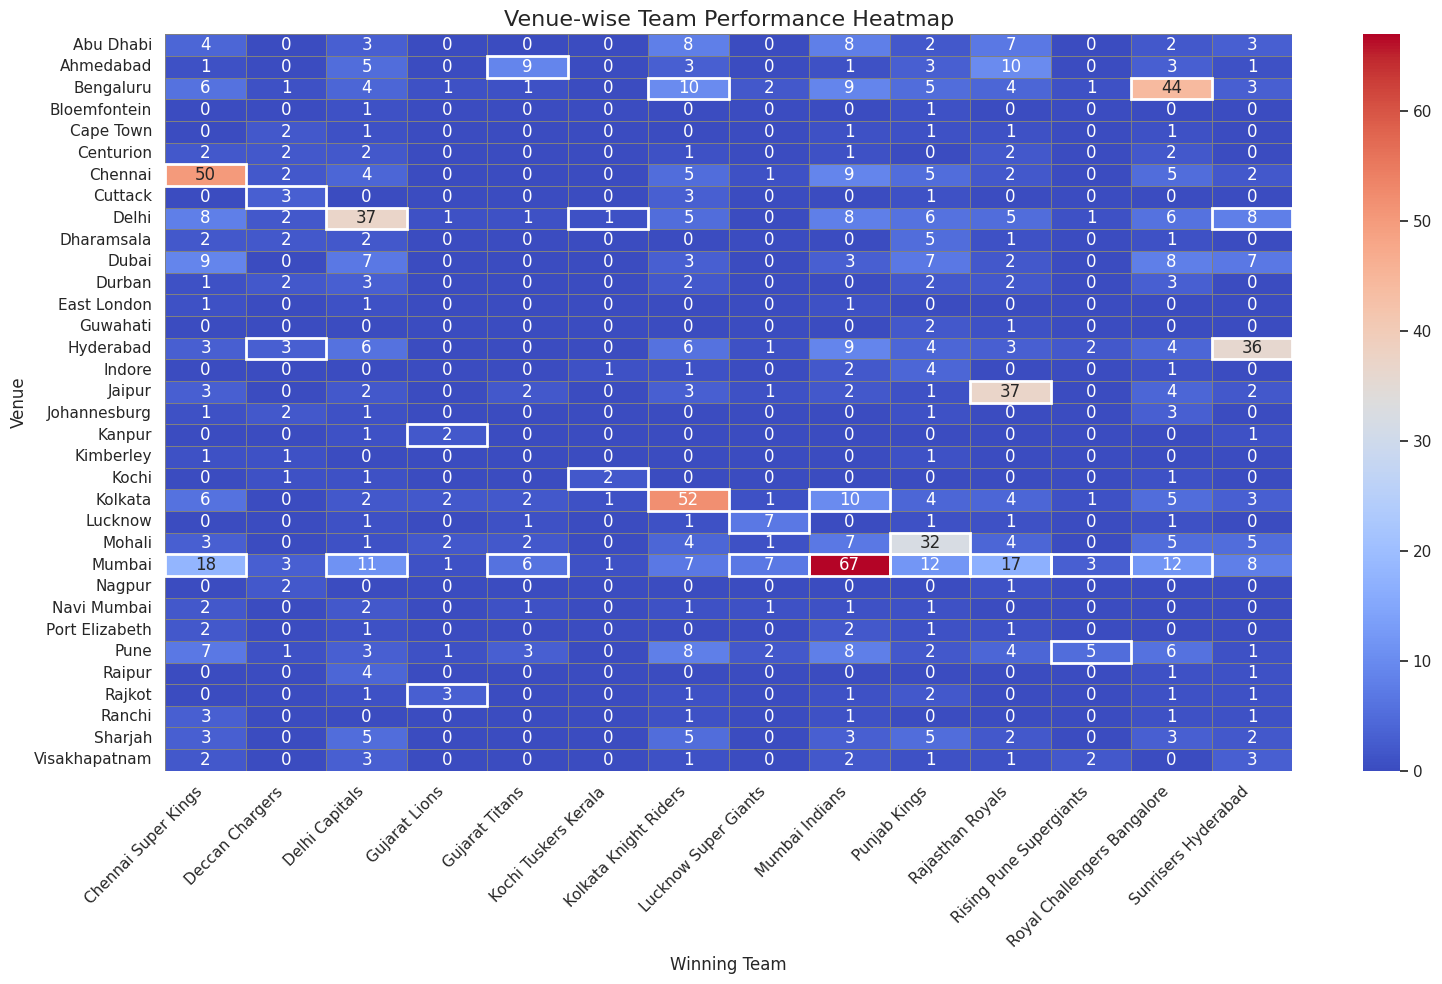

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your dataset
# Filter out rows where winner is "No Result"
filtered_df = df[df['winner'] != 'No Result']

# Group data by 'city' and 'winner', and count matches
venue_team_performance = filtered_df.groupby(['city', 'winner']).size().unstack(fill_value=0)

# Find top two records for each team
top_two_indices = venue_team_performance.apply(lambda x: x.nlargest(2).index.tolist(), axis=0)

# Create a mask for highlighting top two values
highlight_mask = np.zeros_like(venue_team_performance, dtype=bool)
for col_idx, (col, indices) in enumerate(top_two_indices.items()):
    for row in indices:
        row_idx = venue_team_performance.index.get_loc(row)
        highlight_mask[row_idx, col_idx] = True

# Plot heatmap
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    venue_team_performance,
    cmap='coolwarm',
    annot=True,
    fmt='d',
    cbar=True,
    linewidths=0.5,
    linecolor='grey'
)

# Add red borders to top two records for each team
for y, x in zip(*np.where(highlight_mask)):
    ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='white', lw=2))

# Customize the plot
plt.title('Venue-wise Team Performance Heatmap', fontsize=16)
plt.xlabel('Winning Team', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


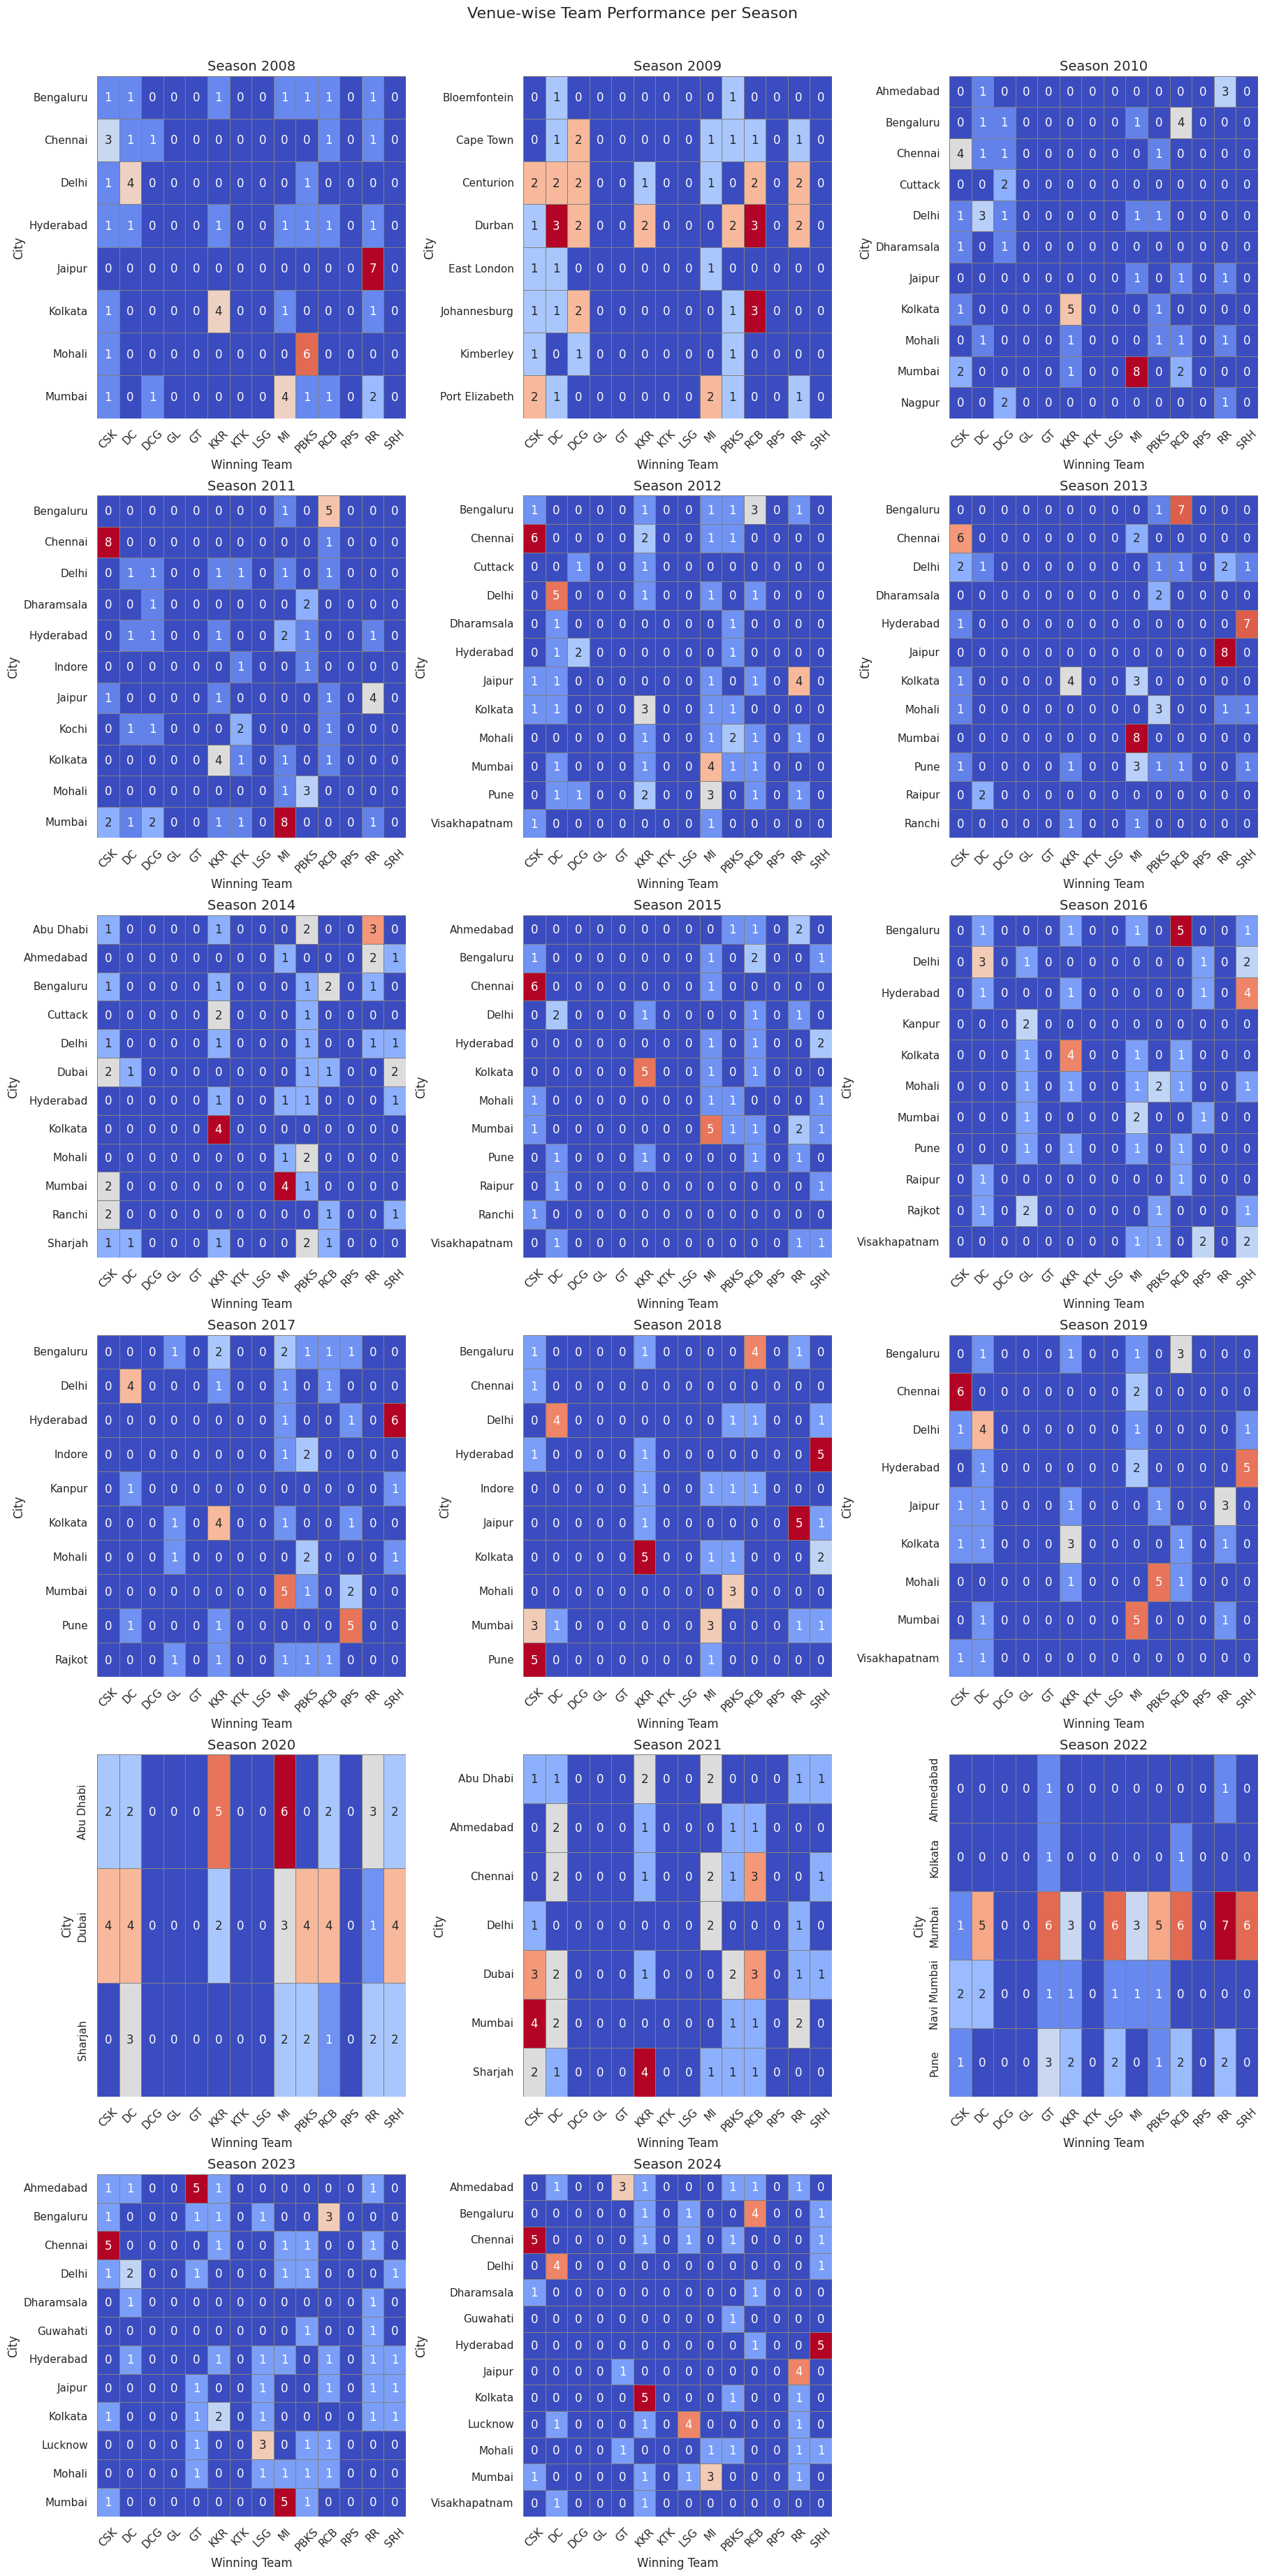

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define abbreviations for team names
team_abbreviations = {
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Kolkata Knight Riders': 'KKR',
    'Royal Challengers Bangalore': 'RCB',
    'Sunrisers Hyderabad': 'SRH',
    'Rajasthan Royals': 'RR',
    'Delhi Capitals': 'DC',
    'Kings XI Punjab': 'KXIP',
    'Punjab Kings': 'PBKS',  # Updated name
    'Gujarat Titans': 'GT',
    'Lucknow Super Giants': 'LSG',
    'Deccan Chargers': 'DCG',
    'Pune Warriors': 'PW',
    'Rising Pune Supergiants': 'RPS',
    'Rising Pune Supergiant': 'RPS',  # Alternate spelling
    'Gujarat Lions': 'GL',
    'Kochi Tuskers Kerala':'KTK'
}

def plot_seasonal_heatmaps_with_abbreviations(df):
    # Apply team abbreviations to the dataset
    df['winner'] = df['winner'].map(team_abbreviations).fillna(df['winner'])

    # Filter out "No Result" from winners
    df = df[df['winner'] != 'No Result']

    # Group by season, city, and winner to calculate wins
    year_city_team_performance = (
        df.groupby(['normalized_season', 'city', 'winner'])
        .size()
        .unstack(fill_value=0)
    )

    # Get unique seasons
    seasons = year_city_team_performance.index.levels[0]

    # Set up the subplots
    n_seasons = len(seasons)
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = (n_seasons + n_cols - 1) // n_cols  # Calculate the number of rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    # Plot each season's heatmap
    for i, season in enumerate(seasons):
        season_data = year_city_team_performance.loc[season]

        sns.heatmap(
            season_data,
            cmap="coolwarm",
            annot=True,
            fmt="d",
            ax=axes[i],
            linewidths=0.5,
            linecolor="gray",
            cbar=False
        )
        axes[i].set_title(f"Season {season}", fontsize=14)
        axes[i].set_xlabel("Winning Team", fontsize=12)
        axes[i].set_ylabel("City", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Add a global title
    fig.suptitle("Venue-wise Team Performance per Season", fontsize=16, y=1.02)
    plt.show()

# Example usage
plot_seasonal_heatmaps_with_abbreviations(df)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

team_abbreviations = {
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Kolkata Knight Riders': 'KKR',
    'Royal Challengers Bangalore': 'RCB',
    'Sunrisers Hyderabad': 'SRH',
    'Rajasthan Royals': 'RR',
    'Delhi Capitals': 'DC',
    'Kings XI Punjab': 'KXIP',
    'Punjab Kings': 'PBKS',  # Updated name
    'Gujarat Titans': 'GT',
    'Lucknow Super Giants': 'LSG',
    'Deccan Chargers': 'DCG',
    'Pune Warriors': 'PW',
    'Rising Pune Supergiants': 'RPS',
    'Rising Pune Supergiant': 'RPS',  # Alternate spelling
    'Gujarat Lions': 'GL',
    'Kochi Tuskers Kerala':'KTK'
}

def plot_toss_decision_sunburst(df):
    """
    Creates a Sunburst Chart for toss decision percentage analysis in each city.

    Parameters:
        df (pd.DataFrame): The IPL dataset containing toss decision and city data.
    """
    # Group by city and toss decision to calculate the count
    toss_decision_city = (
        df.groupby(['city', 'toss_decision'])
        .size()
        .reset_index(name='Count')
    )

    # Add a percentage column
    total_by_city = toss_decision_city.groupby('city')['Count'].transform('sum')
    toss_decision_city['Percentage'] = (toss_decision_city['Count'] / total_by_city) * 100

    # Plot the Sunburst chart
    fig = px.sunburst(
        toss_decision_city,
        path=['city', 'toss_decision'],
        values='Count',
        color='Percentage',
        color_continuous_scale='Viridis',
        title="Toss Decision Percentage by City",
    )

    fig.update_traces(textinfo="label+percent entry")
    fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
    fig.show()

# Example usage
plot_toss_decision_sunburst(df)


In [ ]:
def analyze_playoff_stadiums(df):
    """
    Analyzes playoff matches played at different stadiums.

    Parameters:
        df (pd.DataFrame): The IPL dataset containing match data.

    Returns:
        pd.DataFrame: Grouped data showing the count of playoff matches by stadium and match type.
    """
    # Define the playoff match types
    playoff_types = [
        'Semi Final', 'Final', '3rd Place Play-Off',
        'Qualifier 1', 'Elimination Final', 'Qualifier 2', 'Eliminator'
    ]

    # Filter for playoff matches
    playoff_matches = df[df['match_type'].isin(playoff_types)]

    # Group by venue and match type, and count the number of matches
    grouped_playoffs = (playoff_matches.groupby(['city', 'match_type'])
                        .size()
                        .reset_index(name='Match Count'))

    # Pivot to create a table with venues as rows and match types as columns
    playoff_summary = grouped_playoffs.pivot(index='city', columns='match_type', values='Match Count').fillna(0)

    # Add a total count column for each stadium
    playoff_summary['Total Matches'] = playoff_summary.sum(axis=1)

    # Sort by total matches
    playoff_summary = playoff_summary.sort_values(by='Total Matches', ascending=False)

    return playoff_summary

# Analyze playoff stadiums
playoff_stadium_analysis = analyze_playoff_stadiums(df)



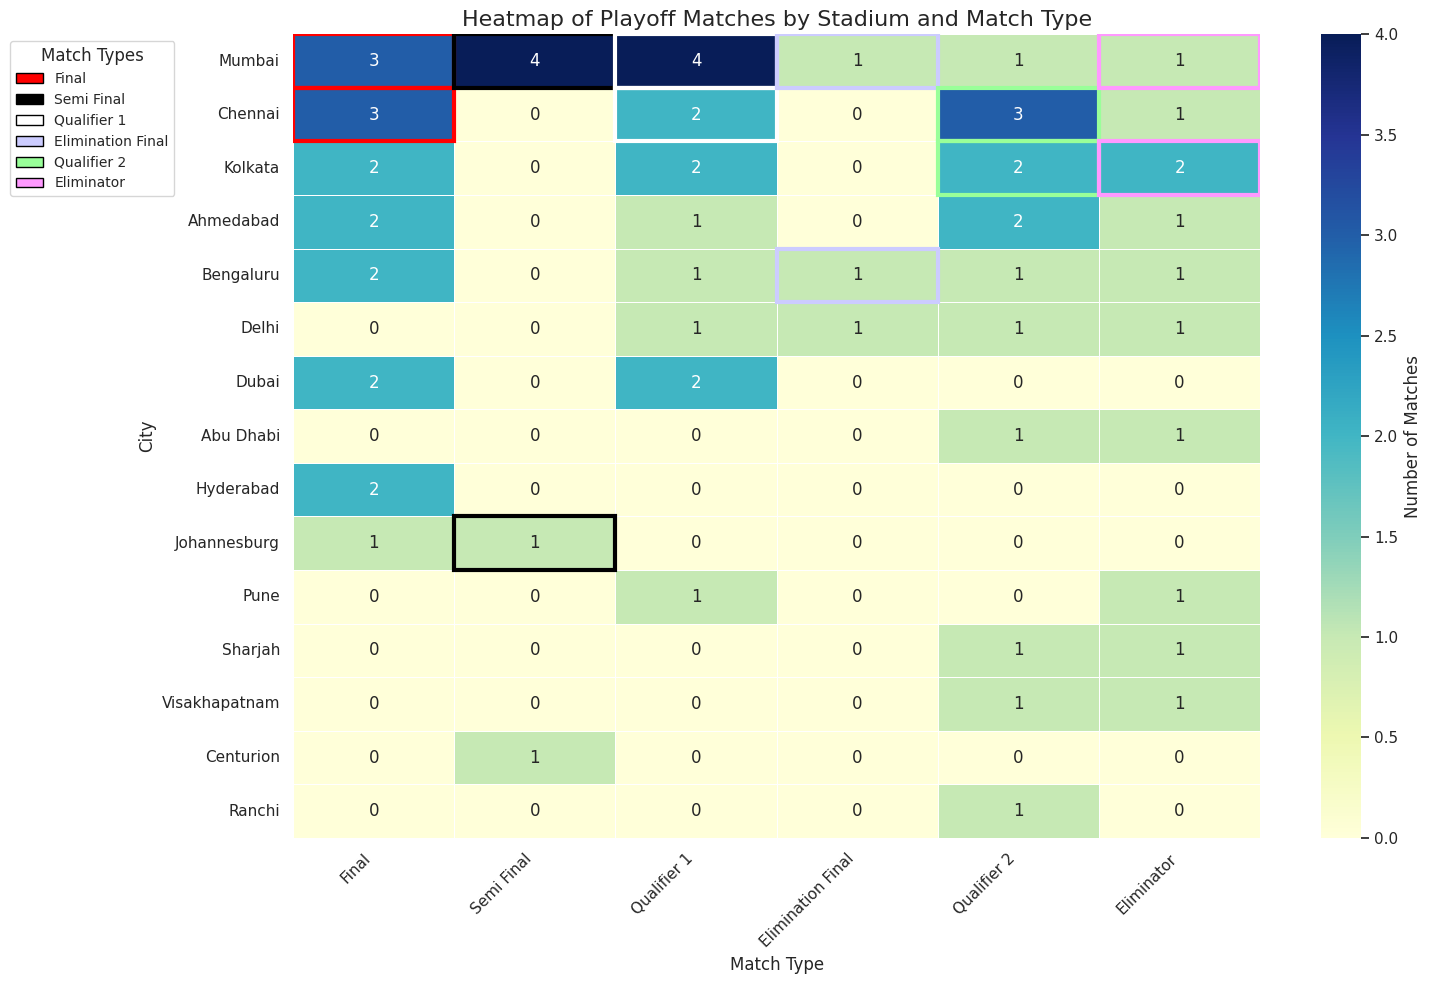

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def plot_category_highlighted_heatmap(playoff_summary):

    # Define the match types and their specific highlight colors
    match_types_colors = {
        'Final': 'red',  # Light Red
        'Semi Final': 'black',  # Light Blue
        'Qualifier 1': 'white',  # Light Orange
        'Elimination Final': '#CCCCFF',  # Light Purple
        'Qualifier 2': '#99FF99',  # Light Green
        'Eliminator': '#FF99FF',  # Light Pink
    }

    # Filter to keep only the relevant match types
    match_types = list(match_types_colors.keys())
    playoff_filtered = playoff_summary[match_types]

    # Create a figure
    plt.figure(figsize=(14, 10))

    # Draw the heatmap
    sns.heatmap(
        playoff_filtered,
        annot=True,
        fmt=".0f",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar_kws={'label': 'Number of Matches'},
    )

    # Highlight the top two values for each match type
    ax = plt.gca()
    for i, match_type in enumerate(match_types):
        # Get the top two values and their integer-based indices
        top_indices = playoff_filtered[match_type].nlargest(2).index
        row_positions = [playoff_filtered.index.get_loc(idx) for idx in top_indices]  # Convert to positional indices

        for row_pos in row_positions:
            ax.add_patch(plt.Rectangle((i, row_pos), 1, 1, fill=False, edgecolor=match_types_colors[match_type], lw=3))

    # Customize the plot
    plt.title("Heatmap of Playoff Matches by Stadium and Match Type", fontsize=16)
    plt.xlabel("Match Type", fontsize=12)
    plt.ylabel("City", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Create a legend for category-specific colors
    legend_elements = [
        Patch(facecolor=color, edgecolor='black', label=match_type)
        for match_type, color in match_types_colors.items()
    ]
    plt.legend(
        handles=legend_elements,
        loc='upper left',
        bbox_to_anchor=(-0.3, 1),
        title="Match Types",
        fontsize=10
    )

    # Show the plot
    plt.show()

# Plot the heatmap with category-specific highlights
plot_category_highlighted_heatmap(playoff_stadium_analysis)


### Heatmap of Playoff Matches:
1. **Top Performers**: Mumbai (4) and Chennai (3) lead in finals appearances, indicating their strong performances in playoff matches.
2. **Match Distribution**: Occurrences of various match types (finals, qualifiers, eliminators) vary significantly across cities, with some cities hosting more critical matches than others.
3. **City Impact**: Cities like Kolkata and Bengaluru have multiple playoff matches, highlighting their role as significant venues for IPL playoff events.

### Toss Decision Percentage by City:
4. **Toss Trends**: Mumbai leads with a 16% tendency to bat first, while Kolkata and Bengaluru show a mixed approach, with significant fielding percentages (12% and 9% respectively).
5. **Strategic Preferences**: Teams demonstrate varying strategies based on city conditions, informing future toss decisions and game strategies.

These insights can help teams refine their strategies in playoff scenarios.

In [ ]:
df.head()

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,normalized_season
0,2007/08,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,KKR,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2008
1,2007/08,Mohali,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,CSK,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri,2008
2,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,DC,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008
3,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,RCB,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,2008
4,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,KKR,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan,2008


#	5. Player of the Match analysis

### **1. Most Player of the Match Awards**
- **Analysis Goal:** Identify the players with the most "Player of the Match" awards.
- **Plot Suggestion:** A horizontal bar chart to show the top 10 players with the most awards.

<ipython-input-57-e4132be66f2b>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




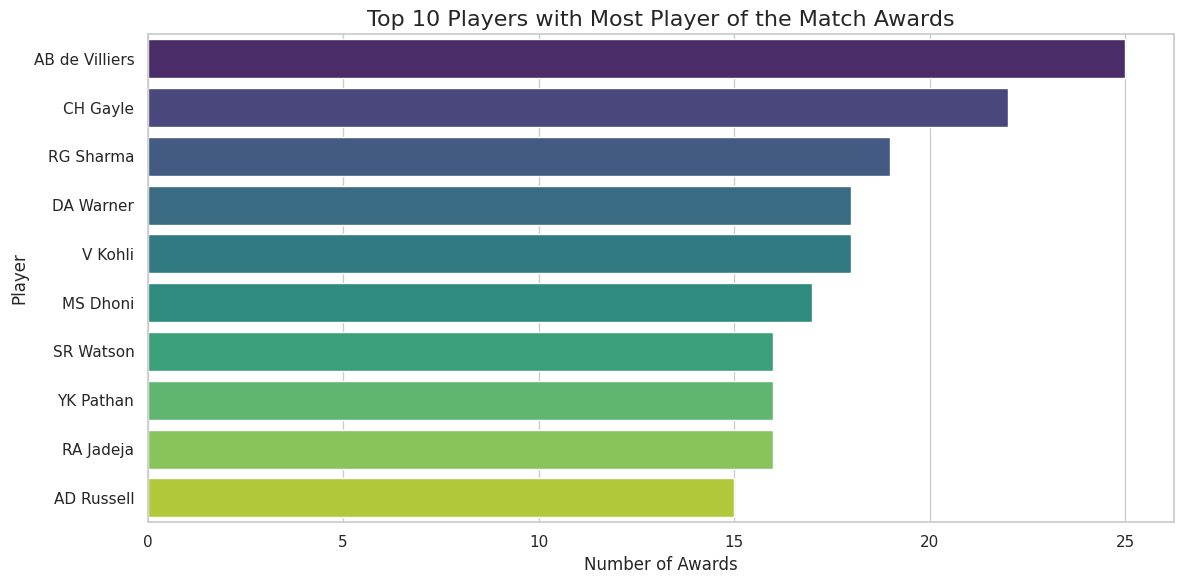

Top 10 Players with Most Player of the Match Awards:
           Player  Awards
0  AB de Villiers      25
1        CH Gayle      22
2       RG Sharma      19
3       DA Warner      18
4         V Kohli      18
5        MS Dhoni      17
6       SR Watson      16
7       YK Pathan      16
8       RA Jadeja      16
9      AD Russell      15
Player of the Match analysis saved to 'player_of_match_awards_analysis.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to analyze and visualize the most Player of the Match awards
def analyze_player_of_match_awards(df):
    # Count Player of the Match awards
    player_awards = df['player_of_match'].value_counts().reset_index()
    player_awards.columns = ['Player', 'Awards']

    # Get the top 10 players
    top_players = player_awards.head(10)

    # Plot the top 10 players
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_players['Awards'], y=top_players['Player'], palette='viridis')
    plt.title('Top 10 Players with Most Player of the Match Awards', fontsize=16)
    plt.xlabel('Number of Awards', fontsize=12)
    plt.ylabel('Player', fontsize=12)
    plt.tight_layout()
    plt.show()

    return player_awards

# Example Usage
player_awards = analyze_player_of_match_awards(df)

# Display top players
print("Top 10 Players with Most Player of the Match Awards:")
print(player_awards.head(10))

# Save to CSV
player_awards.to_csv("player_of_match_awards_analysis.csv", index=False)
print("Player of the Match analysis saved to 'player_of_match_awards_analysis.csv'")


### **2. Team-wise Player of the Match Distribution**
*  **Analysis Goal:** Analyze which teams have players frequently winning
*   **Plot Suggestion:** A grouped bar chart or heatmap showing teams on the x-axis and players on the y-axis.





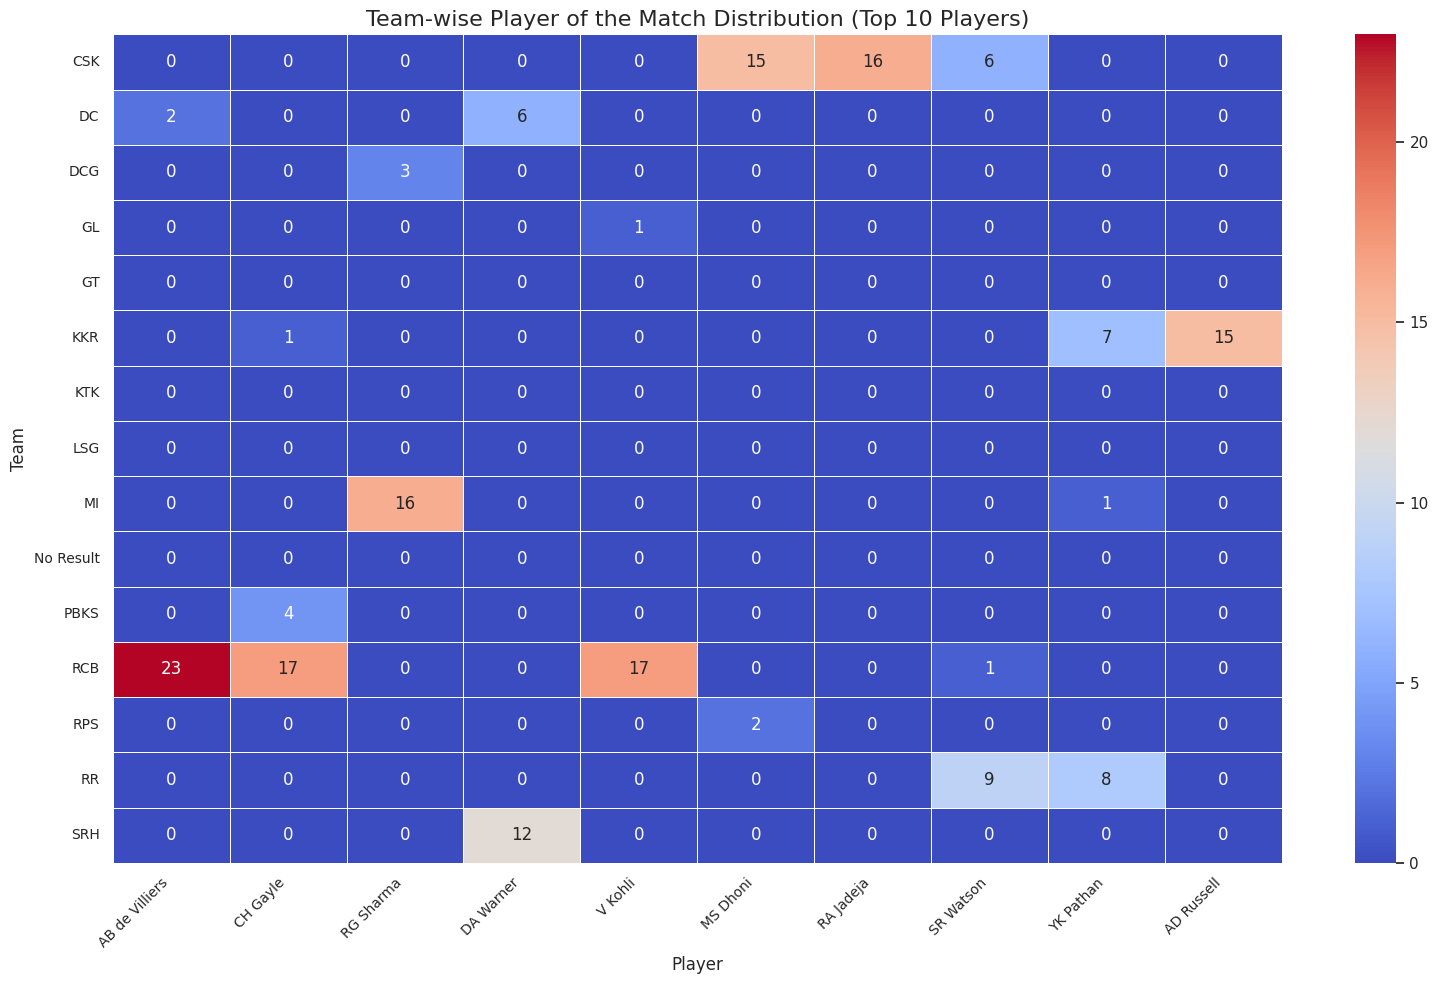

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_player_of_match_distribution(df):
    """
    Analyzes and visualizes the distribution of Player of the Match awards team-wise.

    Parameters:
        df (pd.DataFrame): The IPL dataset containing match data.

    Returns:
        None
    """
    # Count Player of the Match awards for each player by team
    player_team_awards = df.groupby(['winner', 'player_of_match']).size().unstack(fill_value=0)

    # Normalize column names for better readability
    player_team_awards.index.name = 'Team'
    player_team_awards.columns.name = 'Player'

    # Filter top players across teams (players with significant awards)
    top_players = player_team_awards.sum(axis=0).nlargest(10).index
    filtered_awards = player_team_awards[top_players]

    # Plot heatmap for team-wise Player of the Match distribution
    plt.figure(figsize=(16, 10))
    sns.heatmap(filtered_awards, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=.5)
    plt.title('Team-wise Player of the Match Distribution (Top 10 Players)', fontsize=16)
    plt.xlabel('Player', fontsize=12)
    plt.ylabel('Team', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Example Usage
analyze_player_of_match_distribution(df)


### **4. Role-based Player of the Match Analysis**


*  **Analysis Goal:** Split the awards based on player roles (e.g., batsman, bowler, all-rounder).
*   **Data Preparation:** Add a role column in the dataset if it's available or infer roles based on player data.

* **Plot Suggestion:** A pie chart or stacked bar chart showing the distribution of awards by roles.






In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aryanverma99/ipl-2024-player-lifetime-dataset")

print("Path to dataset files:", path)

100%|██████████| 33.3k/33.3k [00:00<00:00, 21.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aryanverma99/ipl-2024-player-lifetime-dataset/versions/1


In [ ]:
file_name_3 = "cricket_data.csv"
file_path_3 = os.path.join(path, file_name_3)
df_playerinfo=pd.read_csv(file_path_3)

In [ ]:
import pandas as pd

# Load the player data
player_stats = df_playerinfo.copy()

# Define thresholds for classification
def classify_player(row):
    is_batsman = row['Runs_Scored'] >= 1000 and row['Batting_Average'] >= 30
    is_bowler = row['Wickets_Taken'] >= 50 and row['Bowling_Average'] <= 30
    if is_batsman and is_bowler:
        return 'All-rounder'
    elif is_batsman:
        return 'Batsman'
    elif is_bowler:
        return 'Bowler'
    else:
        return 'Unclassified'

# Apply classification to each player
player_stats['Player_Role'] = player_stats.apply(classify_player, axis=1)

# Display the classification counts
role_counts = player_stats['Player_Role'].value_counts()
print(role_counts)

# Save the classified dataset
player_stats.to_csv("classified_player_stats.csv", index=False)
print("Player roles saved to 'classified_player_stats.csv'")


TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
len(df.player_of_match.unique())

292

# Conclusion:
The analysis reveals several significant patterns in IPL history:

* ***Team Performance:*** Mumbai Indians and Chennai Super Kings emerge as the most successful teams, establishing themselves in the top tier of performance.
* ***Seasonal Evolution:*** The number of matches per season has remained relatively stable, with recent increases due to league expansion.
* ***Venue Impact:*** Clear evidence of home advantage exists, with teams typically performing better at their home venues. Mumbai, Kolkata, and Delhi emerge as the most frequently used venues.
* ***Tournament Growth:*** The analysis demonstrates the IPL's evolution from a domestic tournament to a global cricket event, with matches being played across multiple international venues.
* ***Competitive Balance:*** While established teams dominate the overall statistics, the league shows competitive balance with new teams like Gujarat Titans achieving success in recent seasons.